### Introdução ao Problema

O problema do caixeiro viajante (TSP) é encontrar o caminho de menor custo que visita um conjunto de \(n\) cidades exatamente uma vez e retorna à cidade inicial. Suponha que temos uma matriz de distâncias \(D\) onde \(D[i][j]\) representa a distância entre a cidade \(i\) e a cidade \(j\).

### Ideia Principal

A ideia principal do algoritmo Held-Karp é usar programação dinâmica para evitar recalcular subproblemas repetidos. Em vez de calcular todas as permutações possíveis das cidades (força bruta), armazenamos as soluções parciais para subconjuntos de cidades e as reutilizamos.

### Notação

- \(n\): Número de cidades.
- \(S \subseteq \{0, 1, 2, \ldots, n-1\}\): Um subconjunto de cidades.
- \(|S|\): Número de elementos no subconjunto \(S\).
- \(C(S, j)\): Custo mínimo de visitar todas as cidades no subconjunto \(S\), terminando na cidade \(j\).

### Passos do Algoritmo

#### 1. Definir Subproblemas

Para cada subconjunto de cidades \(S\) e para cada cidade \(j\) em \(S\), queremos calcular o custo mínimo \(C(S, j)\).

#### 2. Inicialização

Para o subconjunto com apenas a cidade inicial (cidade 0), o custo é zero:

$$
\begin{equation}
C(\{0\}, 0) = 0
\end{equation}
$$

Para todos os outros subconjuntos que não contêm a cidade inicial, o custo inicial é infinito:

$$
\begin{equation}
C(S, j) = \infty \quad \text{para todos } S \text{ que não contêm 0}
\end{equation}
$$

#### 3. Recursão

Para subconjuntos maiores, calculamos o custo mínimo adicionando a cidade \(j\) ao custo mínimo de visitar todas as outras cidades no subconjunto \(S\) menos \(j\), terminando em alguma cidade \(i\) que não seja \(j\):

$$
\begin{equation}
C(S, j) = \min_{i \in S, i \neq j} \left[ C(S \setminus \{j\}, i) + D[i][j] \right]
\end{equation}
$$

#### 4. Combinação Final

O custo mínimo para visitar todas as cidades e retornar à cidade inicial é dado por:

$$
\begin{equation}
\text{Custo Mínimo} = \min_{j \neq 0} \left[ C(\{0, 1, \ldots, n-1\}, j) + D[j][0] \right]
\end{equation}
$$

### Algoritmo Completo

Vamos detalhar o algoritmo passo a passo com as equações.

#### Inicialização

Para o subconjunto com apenas a cidade inicial:

$$
\begin{equation}
C(\{0\}, 0) = 0
\end{equation}
$$

Para todos os outros subconjuntos que não contêm a cidade inicial, o custo inicial é infinito:

$$
\begin{equation}
C(S, j) = \infty \quad \text{para todos } S \text{ que não contêm 0}
\end{equation}
$$

#### Recursão

Para cada tamanho de subconjunto de 2 a \(n\), iteramos sobre todos os subconjuntos \(S\) de tamanho \(k\) que contêm a cidade inicial. Para cada cidade \(j\) em \(S\), calculamos \(C(S, j)\) usando a fórmula de recursão:

$$
\begin{equation}
C(S, j) = \min_{i \in S, i \neq j} \left[ C(S \setminus \{j\}, i) + D[i][j] \right]
\end{equation}
$$

#### Combinação Final

Finalmente, calculamos o custo mínimo para visitar todas as cidades e retornar à cidade inicial:

$$
\begin{equation}
\text{Custo Mínimo} = \min_{j \neq 0} \left[ C(\{0, 1, \ldots, n-1\}, j) + D[j][0] \right]
\end{equation}
$$

### 0) Importação das Bibliotecas:

In [1]:
import locale
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
### from prettytable import PrettyTable
from itertools import product
from math import sqrt
import random
import folium
from pyproj import Proj
### import gurobipy as gp
### from gurobipy import GRB
# importing googlemaps module
#import googlemaps
import pandas as pd
import geopy.distance as gd
import sys
import time
import os
import itertools

# Chamando o arquivo .py com as funções implementadas
import Modulo_exato

### 1) Carregamento dos bancos de dados:

In [2]:
# Carregamento dos dados dos postos de saúde já tratados:
cab = ['Índice','Região','Endereço','CoordenadaXY','X','Y']
postos_data = pd.read_csv('../Banco_de_dados/postos_data.csv', sep=',', skiprows=1, names = cab)
postos_data.head()

,Índice,Região,Endereço,CoordenadaXY,X,Y
0,0,Centro,Rua Coronel José Monteiro 407 Centro,-23.181409264128344 -45.88413629003892,-45.884136,-23.181409
1,1,Centro,Avenida Anchieta 1069 Jardim Nova América,-23.19300408207269 -45.90407824956441,-45.904078,-23.193004
2,2,Centro,Rua Martins Pereira 263 Jardim Paulista,-23.190159425525938 -45.87033204771088,-45.870332,-23.190159
3,3,Centro,Rua São Pedro 55 Vila Maria,-23.17685304237057 -45.878886747711434,-45.878887,-23.176853
4,4,Leste,Rua Júlia Cursino 161 Americano,-23.179259398036233 -45.81191067654758,-45.811911,-23.179259


In [3]:
# Carregamento dos dados do público alvo já tratados:
cab = ['Índice', 'id', 'oms_id', 'Nome', 'loteamento', 'Região', 'X', 'Y','clusters']
publico_data = pd.read_csv('../Banco_de_dados/publico_data_clean_clusters.csv', sep=',', skiprows=1, names = cab)
publico_data.head()

#### Atenção! usar o "publico_data_clean.csv"

,Índice,id,oms_id,Nome,loteamento,Região,X,Y,clusters
0,0,2779,131745502.0,Sem nome,Altos da Quinta,Sul,-45.870127,-23.260867,9
1,1,2226,256249039.0,Gentil Pereira do Nascimento,Altos da Quinta,Sul,-45.869097,-23.258867,9
2,2,2827,131745503.0,Doze,Altos da Quinta,Sul,-45.869010,-23.257458,9
3,3,2828,131745505.0,Treze,Altos da Quinta,Sul,-45.867334,-23.258407,9
4,4,7804,319795429.0,Cinco,Altos da Quinta,Sul,-45.870646,-23.256537,1


In [4]:
# Usando a função mapa_regiao para plot do mapa personalizado:

Modulo_exato.Region_map(postos_data, 
                  publico_data, 
                  postos_data.X,
                  postos_data.Y, 
                  publico_data.X, 
                  publico_data.Y, 
                  regiao='Sudeste', 
                  cor='red')

### 2) Funções auxiliares para o Held-Karp:

In [5]:
# Automatização do calculo de distância entre coordenadas usando a biblioteca geopy:
def coord_dist(coord_1, coord_2):
    '''
    Função para calcular a distância entre dois pontos usando a geodésica
    
    input: 
        latitude e longitude de dois pontos

    operação:
        lat1 + long1 = coordenada 1
        lat2 + long2 = coordenada 2
        dist geodesica (coordenada 1, coordenada 2)

    output: 
        distância em Km entre as coordenadas 1 e 2
    '''

    return gd.geodesic(coord_1, coord_2).km

In [6]:
def calcular_distancias(df, ponto_inicial, raio):
    distancias = []
    coordenadas = list(zip(df['Latitude'], df['Longitude']))
    for i, coord in enumerate(coordenadas):
        distancia = coord_dist(ponto_inicial, coord)
        if distancia <= raio:
            distancias.append((i, distancia))
        
    return distancias

### 3) Aplicação do otimizador Held-Karp:

In [7]:
def held_karp(dists):
    n = len(dists)
    
    # Inicializar a tabela de custos mínimos
    C = {}
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)
    
    # Populando a tabela de custos mínimos usando programação dinâmica
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev_bits = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev_bits, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)
    
    # Calculando o custo mínimo para retornar à cidade inicial
    bits = (2**n - 1) - 1
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))
    opt, parent = min(res)
    
    # Reconstruir o caminho
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits
    
    path.append(0)
    return opt, list(reversed(path))

In [8]:
import itertools

def held_karp(dists):
    n = len(dists)
    
    # Verificar se há menos de 2 coordenadas
    if n <= 1:
        print("Erro: O número de coordenadas deve ser maior que 1 para realizar a otimização.")
        return None, []

    # Inicializar a tabela de custos mínimos
    C = {}
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)
    
    # Populando a tabela de custos mínimos usando programação dinâmica
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev_bits = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev_bits, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)
    
    # Calculando o custo mínimo para retornar à cidade inicial
    bits = (2**n - 1) - 1
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))
    
    # Verificar se a lista res está vazia
    if not res:
        print("Erro: Não há caminho válido para otimização.")
        return None, []

    opt, parent = min(res)
    
    # Reconstruir o caminho
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits
    
    path.append(0)
    return opt, list(reversed(path))


### 4) Geração do caminho com os condicionais:

##### Obs: aqui ele é aplicado após a formação dos caminhos

In [9]:
def filtrar_coordenadas(coordenadas):
    """
    Função para filtrar coordenadas geográficas com uma chance de 20% de não visitar, exceto o primeiro par.

    Parâmetros:
    - coordenadas: lista de tuplas (ou listas) com as coordenadas geográficas (Latitude, Longitude).

    Retorna:
    - no_visit_coord: Lista de coordenadas não visitadas.
    - visit_coord: Lista de coordenadas visitadas.
    """
    no_visit_coord = []
    visit_coord = []

    # Garantir que o primeiro par de coordenadas seja sempre visitado
    visit_coord.append(coordenadas[0])

    # Iterar sobre as coordenadas, exceto a primeira
    for i in range(1, len(coordenadas)):
        # Aplicar probabilidade de 20% de "não visita"
        if random.random() < 0.2:
            no_visit_coord.append(coordenadas[i])
        else:
            visit_coord.append(coordenadas[i])

    return no_visit_coord, visit_coord


In [10]:
import random

def filtrar_coordenadas(coordenadas):
    """
    Função para filtrar coordenadas geográficas com uma chance de 20% de não visitar, exceto o primeiro par.

    Parâmetros:
    - coordenadas: lista de tuplas (ou listas) com as coordenadas geográficas (Latitude, Longitude).

    Retorna:
    - no_visit_coord: Lista de coordenadas não visitadas.
    - visit_coord: Lista de coordenadas visitadas.
    """
    no_visit_coord = []
    visit_coord = []

    # Verificar se há apenas uma coordenada
    if len(coordenadas) == 1:
        # Se houver apenas uma, ela será visitada e não haverá locais não visitados
        visit_coord.append(coordenadas[0])
        return no_visit_coord, visit_coord

    # Garantir que o primeiro par de coordenadas seja sempre visitado
    visit_coord.append(coordenadas[0])

    # Iterar sobre as coordenadas, exceto a primeira
    for i in range(1, len(coordenadas)):
        # Aplicar probabilidade de 20% de "não visita"
        if random.random() < 0.2:
            no_visit_coord.append(coordenadas[i])
        else:
            visit_coord.append(coordenadas[i])

    return no_visit_coord, visit_coord


In [11]:
def otimizador_held_karp_4(df, raio, max_locais=20, fator_aumento=0.1, veiculo='bike', max_time=5.5):
    """
    Função para otimização utilizando o algoritmo Held-Karp, considerando um limite de tempo total.

    Parâmetros:
    - df: DataFrame contendo as coordenadas das localidades (a primeira linha contém o ponto inicial).
    - raio: Raio inicial de busca.
    - max_locais: Número máximo de locais que o agente pode visitar.
    - fator_aumento: Fator de aumento do raio caso o número de locais dentro do raio seja insuficiente.
    - veiculo: Tipo de veículo utilizado (ex: 'bike' ou 'carro').
    - max_time: Tempo máximo permitido para o caminho.

    Retorna:
    - opt: Otimização realizada pelo algoritmo Held-Karp.
    - caminho_original: Lista de índices representando o caminho otimizado.
    - tempo_total: Tempo total gasto no caminho.
    """
    tempo_total = 0

    # Ponto inicial é a primeira linha do DataFrame
    ponto_inicial = (df.iloc[0]['Latitude'], df.iloc[0]['Longitude'])

    # Loop para ajustar o raio até que tenha no mínimo "max_locais" dentro do raio
    while True:
        # Calcular distâncias para todas as localidades dentro do raio de busca
        locais_no_raio = calcular_distancias(df, ponto_inicial, raio)

        # Se o número de locais no raio for suficiente, sair do loop
        if len(locais_no_raio) >= max_locais:
            break

        # Caso contrário, aumentar o raio por um fator de 0.1
        raio += raio * fator_aumento
        print(f'Novo raio: {raio}')

    # Filtrar os locais que estão dentro do limite de locais que o agente pode visitar
    locais_no_raio = sorted(locais_no_raio, key=lambda x: x[1])[:max_locais]

    # Extrair os índices das localidades selecionadas
    indices = [i for i, _ in locais_no_raio]

    # Montar a matriz de distâncias entre os locais selecionados
    n = len(indices)
    dists = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            dist = coord_dist(
                (df.iloc[indices[i]]['Latitude'], df.iloc[indices[i]]['Longitude']),
                (df.iloc[indices[j]]['Latitude'], df.iloc[indices[j]]['Longitude'])
            )
            dists[i][j] = dist
            dists[j][i] = dist

    # Resolver o TSP com Held-Karp para os locais selecionados
    opt, caminho = held_karp(dists)

    # Converter o caminho para os índices originais do DataFrame
    caminho_original = [indices[i] for i in caminho]

    # Calcular o tempo total considerando o percurso do agente
    for k in range(1, len(caminho_original)):
        # Calcular a distância entre o ponto atual e o anterior
        dist = coord_dist(
            (df.iloc[caminho_original[k - 1]]['Latitude'], df.iloc[caminho_original[k - 1]]['Longitude']),
            (df.iloc[caminho_original[k]]['Latitude'], df.iloc[caminho_original[k]]['Longitude'])
        )

        # Calcular o tempo gasto para percorrer essa distância
        tempo = Modulo_exato.working_day_time(dist, veiculo)
        novo_tempo_total = tempo_total + tempo

        # Verificar se o tempo total excede o limite permitido
        if novo_tempo_total > max_time:
            print(f'Tempo máximo excedido: {novo_tempo_total}')
            break

        # Atualizar o tempo total
        tempo_total = novo_tempo_total

    return opt, caminho_original, tempo_total


In [12]:
def otimizador_held_karp_5(df, raio, max_locais=20, fator_aumento=0.1, veiculo='bike', max_time=5.5):
    """
    Função para otimização utilizando o algoritmo Held-Karp, considerando um limite de tempo total.

    Parâmetros:
    - df: DataFrame contendo as coordenadas das localidades (a primeira linha contém o ponto inicial).
    - raio: Raio inicial de busca.
    - max_locais: Número máximo de locais que o agente pode visitar.
    - fator_aumento: Fator de aumento do raio caso o número de locais dentro do raio seja insuficiente.
    - veiculo: Tipo de veículo utilizado (ex: 'bike' ou 'carro').
    - max_time: Tempo máximo permitido para o caminho.

    Retorna:
    - opt: Otimização realizada pelo algoritmo Held-Karp.
    - caminho_original: Lista de índices representando o caminho otimizado.
    - tempo_total: Tempo total gasto no caminho.
    """
    tempo_total = 0

    # Ponto inicial é a primeira linha do DataFrame
    ponto_inicial = (df.iloc[0]['Latitude'], df.iloc[0]['Longitude'])

    # Loop para ajustar o raio até que tenha no mínimo "max_locais" dentro do raio
    while True:
        # Calcular distâncias para todas as localidades dentro do raio de busca
        locais_no_raio = calcular_distancias(df, ponto_inicial, raio)

        # Se o número de locais no raio for suficiente, sair do loop
        if len(locais_no_raio) >= max_locais:
            break

        # Caso contrário, aumentar o raio por um fator de 0.1
        raio += raio * fator_aumento
        print(f'Novo raio: {raio}')

    # Filtrar os locais que estão dentro do limite de locais que o agente pode visitar
    locais_no_raio = sorted(locais_no_raio, key=lambda x: x[1])[:max_locais]

    # Verificação de coordenadas suficientes
    if len(locais_no_raio) <= 1:
        print("Erro: Coordenadas insuficientes para realizar a otimização. Mínimo de 2 coordenadas é necessário.")
        return None, [], 0

    # Extrair os índices das localidades selecionadas
    indices = [i for i, _ in locais_no_raio]

    # Montar a matriz de distâncias entre os locais selecionados
    n = len(indices)
    dists = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            dist = coord_dist(
                (df.iloc[indices[i]]['Latitude'], df.iloc[indices[i]]['Longitude']),
                (df.iloc[indices[j]]['Latitude'], df.iloc[indices[j]]['Longitude'])
            )
            dists[i][j] = dist
            dists[j][i] = dist

    # Resolver o TSP com Held-Karp para os locais selecionados
    opt, caminho = held_karp(dists)

    # Converter o caminho para os índices originais do DataFrame
    caminho_original = [indices[i] for i in caminho]

    # Calcular o tempo total considerando o percurso do agente
    for k in range(1, len(caminho_original)):
        # Calcular a distância entre o ponto atual e o anterior
        dist = coord_dist(
            (df.iloc[caminho_original[k - 1]]['Latitude'], df.iloc[caminho_original[k - 1]]['Longitude']),
            (df.iloc[caminho_original[k]]['Latitude'], df.iloc[caminho_original[k]]['Longitude'])
        )

        # Calcular o tempo gasto para percorrer essa distância
        tempo = Modulo_exato.working_day_time(dist, veiculo)
        novo_tempo_total = tempo_total + tempo

        # Verificar se o tempo total excede o limite permitido
        if novo_tempo_total > max_time:
            print(f'Tempo máximo excedido: {novo_tempo_total}')
            break

        # Atualizar o tempo total
        tempo_total = novo_tempo_total

    return opt, caminho_original, tempo_total


### 5) Super loop:

In [13]:
# Cozinha?
#ponto_inicial = data['Latitude'][0], data['Longitude'][0]
raio = 0.2
ml = 20
v = 'bike'
regiao = 'Sul'

In [14]:
import numpy as np
import pandas as pd
import time
import os

mask_posto = postos_data['Região'] == regiao
mask_posto = postos_data[mask_posto]

start_time = time.time() 

for n in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "super_ite":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n+1, regiao=regiao)
    new_points = np.array([points['Latitude'][:], points['Longitude'][:]]).T
    
    # Inicializa variáveis de controle
    all_best_paths = [] 
    exec(f'all_paths_length_{n} = []')
    exec(f'seq_coord_{n} = []')
    exec(f'visited_coord_{n} = []')
    exec(f'no_visit_coord_{n} = []')
    exec(f'tempo_{n} = []')

    super_ite = len(new_points) - 1
    print('Inicio da geração de caminhos, quantidade de amostras:', super_ite)

    # Super loop:
    while super_ite > 2:
        ml_new = 0
    
        for i in range(0, len(mask_posto)):
            points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n+1, regiao=regiao)
            ponto_inicial = points['Latitude'][0], points['Longitude'][0]
            print('ponto_inicial inicio:', ponto_inicial)
    
            df = points[['Latitude', 'Longitude']]
            new_points = np.array([points['Latitude'], points['Longitude']]).T

            if len(globals()[f'visited_coord_{n}']) > 0:
                df_visited = pd.DataFrame(np.vstack(globals()[f'visited_coord_{n}']), columns=['Latitude', 'Longitude'])
                points = points[~points[['Latitude', 'Longitude']].apply(tuple, axis=1).isin(df_visited.apply(tuple, axis=1))]
                df = points[['Latitude', 'Longitude']]
                new_points = np.array([points['Latitude'], points['Longitude']]).T
                
                print('len_new_points:', len(new_points)-1)
                print('len_df:', len(df)-1)
            
            if len(new_points) - 1 < ml:
                ml_new = len(new_points) - 1
                print('ml_new:', ml_new)
                path_length, best_path, tempo_total = otimizador_held_karp_5(df, raio, max_locais=ml_new, fator_aumento=0.1, veiculo=v, max_time=5.5)
            else:
                path_length, best_path, tempo_total = otimizador_held_karp_5(df, raio, max_locais=ml, fator_aumento=0.1, veiculo=v, max_time=5.5)

            seq = new_points[best_path]
            globals()[f'seq_coord_{n}'].append(seq)
            
            no_visit_coord, visit_coord = filtrar_coordenadas(seq[1:])
        
            globals()[f'all_paths_length_{n}'].append(path_length)
            globals()[f'tempo_{n}'].append(tempo_total)
            globals()[f'visited_coord_{n}'].append(visit_coord)
            globals()[f'no_visit_coord_{n}'].append(no_visit_coord)
    
            len_selec = len(visit_coord)
            super_ite -= len_selec
            print('Quantidade de Coordenadas remanescentes (final):', super_ite)
            
            # Verificação adicional: se super_ite for igual a 1, interrompe o while
            if super_ite == 1:
                print('Apenas uma coordenada restante, avançando para o próximo "n"')
                break  # Interrompe o for e passa para o próximo "n"
        
        if super_ite == 1:
            break  # Interrompe o while e passa para o próximo "n"
                
print(f'\nDuração total: {time.time() - start_time:.0f} segundos')


Inicio da geração de caminhos, quantidade de amostras: 175
ponto_inicial inicio: (-23.250357701037547, -45.8870283053806)
Novo raio: 0.22000000000000003
Novo raio: 0.24200000000000005
Novo raio: 0.26620000000000005
Novo raio: 0.2928200000000001
Novo raio: 0.3221020000000001
Novo raio: 0.35431220000000013
Quantidade de Coordenadas remanescentes (final): 161
ponto_inicial inicio: (-23.250357701037547, -45.8870283053806)
len_new_points: 161
len_df: 161
Novo raio: 0.22000000000000003
Novo raio: 0.24200000000000005
Novo raio: 0.26620000000000005
Novo raio: 0.2928200000000001
Novo raio: 0.3221020000000001
Novo raio: 0.35431220000000013
Novo raio: 0.3897434200000002
Quantidade de Coordenadas remanescentes (final): 143
ponto_inicial inicio: (-23.250357701037547, -45.8870283053806)
len_new_points: 143
len_df: 143
Novo raio: 0.22000000000000003
Novo raio: 0.24200000000000005
Novo raio: 0.26620000000000005
Novo raio: 0.2928200000000001
Novo raio: 0.3221020000000001
Novo raio: 0.35431220000000013


In [16]:
len(seq_coord_0)

12

### 5.0) Análises:

In [ ]:
# Verificação:

s_9 = 0

for k in range(len(globals()[f'visited_coord_9'])):
    s_9 += len(globals()[f'visited_coord_9'][k])

s_9

In [ ]:
s_0

In [ ]:
s_1

In [ ]:
s_2

In [ ]:
s_3

In [ ]:
s_4

In [ ]:
s_5

In [ ]:
s_6

In [ ]:
s_7

In [ ]:
s_8

In [ ]:
s_9

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 1, regiao=regiao)) 

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 2, regiao=regiao)) 

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 3, regiao=regiao)) 

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 4, regiao=regiao)) 

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 5, regiao=regiao)) 

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 6, regiao=regiao)) 

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 7, regiao=regiao)) 

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 8, regiao=regiao)) 

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 9, regiao=regiao)) 

In [ ]:
len(Modulo_exato.Region_data_cluster(postos_data, publico_data, 10, regiao=regiao)) 

##### Tamanhos:

In [ ]:
len(seq_coord_0)

In [ ]:
len(seq_coord_1)

In [ ]:
len(seq_coord_2)

In [ ]:
len(seq_coord_3)

In [ ]:
len(seq_coord_4)

In [ ]:
len(seq_coord_5)

In [ ]:
len(seq_coord_6)

In [ ]:
len(seq_coord_7)

In [ ]:
len(seq_coord_8)

In [ ]:
len(seq_coord_9)

### 5.1) Mapa com os caminhos:

In [15]:
for n in range(0, len(mask_posto)):
    # Defina o caminho da pasta onde deseja salvar os arquivos
    save_path = f'Bike_HK_{regiao}_cluster_{n+1}'
    
    # Verifique se a pasta existe, se não, crie-a
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    # Loop para automatização da geração dos mapas
    for i in range(len(globals()[f'seq_coord_{n}'])):
        # Crie o mapa com as coordenadas principais
        mapa = Modulo_exato.best_way(globals()[f'seq_coord_{n}'][i])
        
        # Adicione as coordenadas da lista extra se existirem
        if i < len(globals()[f'no_visit_coord_{n}']):
            for coord in globals()[f'no_visit_coord_{n}'][i]:
                folium.CircleMarker(
                    location=coord,
                    radius=5,
                    fill=True,
                    color="yellow",
                    fill_color="yellow",
                    fill_opacity=1
                ).add_to(mapa)
        
        # Salva o mapa gerado em um arquivo .html na pasta especificada
        mapa.save(os.path.join(save_path, f'mapa_{i+1}.html'))
        

### 5.1) Super loop para geração da porcentagem de cobertura:

##### Obs: é muito difícil automatizar a alocação para qualquer região! 
##### A solução abaixo é personalizada para a região Oeste!

#### OESTE

In [ ]:

for z in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos:
    output_dir = f'teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)

    if z == 0:
        num_pontos_inicial = len(points) - 3
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) - 2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    

    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Inicializa o índice de rotas
    dia_atual = 1  # Variável para simular os dias
    porcentagens_acumuladas = []  # Lista para armazenar as porcentagens de cobertura
    quantidade_atendida_por_dia = []  # Lista para registrar quantos pontos foram atendidos por dia
    
    #i = 0  # Inicializa o índice fora do loop para controle manual

    while i < len(visited_coord):
        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas
        if z == 0 and i >= 2:
            # Acumula duas rotas a partir da terceira, somando sempre de dois em dois até o final
            if i + 1 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
        
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
        
        # Calcula porcentagem de cobertura:
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
        
        print('selec:', len_selec)
        print('rest:', num_pontos_restantes)
        print('iter:', i)
        print('amostras adicionadas nesta iteração:', amostras_adicionadas if i < 2 else soma_amostras)
    
        # Dados para o gráfico de pizza:
        labels = ['Publico alvo atendido', 'Publico alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]

        
        
        # Cria uma figura com dois subplots lado a lado:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        
        # Ajusta o espaço entre os subplots:
        plt.subplots_adjust(wspace=0.5)  # Aumenta o espaço entre os gráficos
        
        # Gráfico de pizza:
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após a Iteração {i}')
        
        # Dados para o gráfico de barras:
        labels_barras = ['Publico alvo atendido', 'Publico alvo restante']
        quantidades = [len_selec + 1, num_pontos_restantes]  ### Obs: adaptação de uma amostra para adequar a amostra perdida!!!
        
        # Gráfico de barras:
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial + num_pontos_inicial * 0.2)  # Define o valor fixo do eixo y de 0 até 850
        for index, value in enumerate(quantidades):
            if z==0:
                ax2.text(index, value + 10, str(value), ha='center')  # Adiciona rótulos com as quantidades acima das barras
            if z==1:
                ax2.text(index, value + 1, str(value), ha='center')  # Adiciona rótulos com as quantidades acima das barras
        ax2.set_title(f' {amostras_adicionadas if i < 2 else soma_amostras} pontos visitados após a Iteração {i}')
    
        # Salva a figura com ambos os gráficos:
        output_file = os.path.join(output_dir, f'charts_iter_{i}.png')
        plt.savefig(output_file)
        plt.close()

    print('Gráficos salvos em:', output_dir)


#### SUDESTE

In [ ]:
import os
import matplotlib.pyplot as plt

# Novo Sudeste - Processo de cobertura por cluster
for z in range(0, len(mask_posto)):
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos
    output_dir = f'teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Definindo número inicial de pontos a partir do cluster
    if z == 0:
        num_pontos_inicial = len(points) - 2
    elif z == 1:
        num_pontos_inicial = len(points) - 2
    elif z == 2:
        num_pontos_inicial = len(points) - 2
    elif z == 3:
        num_pontos_inicial = len(points) - 2

    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Inicializa o índice de rotas
    dia_atual = 1  # Variável para simular os dias
    porcentagens_acumuladas = []  # Lista para armazenar as porcentagens de cobertura
    quantidade_atendida_por_dia = []  # Lista para registrar quantos pontos foram atendidos por dia
    
    # Loop de alocação de agentes e cobertura de rotas
    while i < len(visited_coord):
        if z == 0 and dia_atual >= 13:  # Acumula 4 rotas a partir do 12º dia
            if i + 3 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i+1]) + len(visited_coord[i+2]) + len(visited_coord[i+3])
            elif i + 2 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i+1]) + len(visited_coord[i+2])
            elif i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i+1])
            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            i += 4  # Pula quatro iterações
            agentes = 4  # Número de agentes alocados

        elif z == 0 and i > 3 and dia_atual < 13:  # Acumula 2 rotas antes do 12º dia
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i+1])
            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            i += 2  # Pula duas iterações
            agentes = 2  # Número de agentes alocados

        elif z == 1 and i > 7:  # Cluster 1, acumula duas rotas após o sétimo índice
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i+1])
            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            i += 2  # Pula duas iterações
            agentes = 2

        else:  # Caso normal, adicionando amostras de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            i += 1  # Avança uma iteração normal
            agentes = 1

        # Calcula a porcentagem de cobertura e restante
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Armazena as porcentagens para gerar gráficos posteriormente
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras if 'soma_amostras' in locals() else amostras_adicionadas)

        # Gráficos para visualização de cobertura
        labels = ['Público alvo atendido', 'Público alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]

        # Criando figuras para os gráficos
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        plt.subplots_adjust(wspace=0.5)

        # Gráfico de pizza
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após o Dia {dia_atual}')

        # Gráfico de barras
        labels_barras = ['Público alvo atendido', 'Público alvo restante']
        quantidades = [len_selec, num_pontos_inicial - len_selec]
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial + num_pontos_inicial * 0.2)
        for index, value in enumerate(quantidades):
            ax2.text(index, value + 10, str(value), ha='center')
        ax2.set_title(f'Quantidade de pontos visitados após o Dia {dia_atual}')

        # Salvando os gráficos
        output_file = os.path.join(output_dir, f'charts_dia_{dia_atual}.png')
        plt.savefig(output_file)
        plt.close()

        dia_atual += 1  # Incrementa o dia após cada iteração
        print(f'Gráficos salvos em: {output_dir}')


#### Centro

In [ ]:
import os
import matplotlib.pyplot as plt

# Novo Sudeste - Processo de cobertura por cluster
for z in range(0, len(mask_posto)):
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    #lvc = len(visited_coord) -1
    
    # Cria pasta para salvar os gráficos
    output_dir = f'Formigas_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Definindo número inicial de pontos a partir do cluster
    if z == 0:
        num_pontos_inicial = len(points)-3
    elif z == 1:
        num_pontos_inicial = len(points)-2 
    elif z == 2:
        num_pontos_inicial = len(points)-2
    elif z == 3:
        num_pontos_inicial = len(points)-2 
    
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Inicializa o índice de rotas
    dia_atual = 1  # Variável para simular os dias
    porcentagens_acumuladas = []  # Lista para armazenar as porcentagens de cobertura
    quantidade_atendida_por_dia = []  # Lista para registrar quantos pontos foram atendidos por dia
    
    # Loop de alocação de agentes e cobertura de rotas
    while i < len(visited_coord):
        if z == 1 and i > 11: #and dia_atual < 17:
            if i + 2 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                #soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2])

            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1}, {i+2} e {i+3} com {soma_amostras} amostras')
            i += 3  # Pula duas iterações
            agentes = 3

        elif z == 2 and i > 6:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
            agentes = 1
        
        
        # Calcula a porcentagem de cobertura e restante
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Armazena as porcentagens para gerar gráficos posteriormente
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras if 'soma_amostras' in locals() else amostras_adicionadas)

        # Gráficos para visualização de cobertura
        labels = ['Público alvo atendido', 'Público alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]

        # Criando figuras para os gráficos
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        plt.subplots_adjust(wspace=0.5)

        # Gráfico de pizza
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após o Dia {dia_atual}')

        # Gráfico de barras
        labels_barras = ['Público alvo atendido', 'Público alvo restante']
        quantidades = [len_selec, num_pontos_inicial - len_selec]
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial + num_pontos_inicial * 0.2)
        for index, value in enumerate(quantidades):
            if z == 0:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 1:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 2:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 3:
                ax2.text(index, value + 5, str(value), ha='center')
        ax2.set_title(f'Quantidade de pontos visitados após o Dia {dia_atual}')

        # Salvando os gráficos
        output_file = os.path.join(output_dir, f'charts_dia_{dia_atual}.png')
        plt.savefig(output_file)
        plt.close()

        dia_atual += 1  # Incrementa o dia após cada iteração
        print(f'Gráficos salvos em: {output_dir}')

#### Norte

In [ ]:
import os
import matplotlib.pyplot as plt

# Novo Sudeste - Processo de cobertura por cluster
for z in range(0, len(mask_posto)):
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    #lvc = len(visited_coord) -1
    
    # Cria pasta para salvar os gráficos
    output_dir = f'Formigas_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Definindo número inicial de pontos a partir do cluster
    if z == 0:
        num_pontos_inicial = len(points)-2
    elif z == 1:
        num_pontos_inicial = len(points)-3 
    elif z == 2:
        num_pontos_inicial = len(points)-3
    elif z == 3:
        num_pontos_inicial = len(points)-2 
    elif z == 4:
        num_pontos_inicial = len(points)-2 
    
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Inicializa o índice de rotas
    dia_atual = 1  # Variável para simular os dias
    porcentagens_acumuladas = []  # Lista para armazenar as porcentagens de cobertura
    quantidade_atendida_por_dia = []  # Lista para registrar quantos pontos foram atendidos por dia
    
    # Loop de alocação de agentes e cobertura de rotas
    while i < len(visited_coord):
        if z == 2 and i > 4: #and dia_atual < 17:
            if i + 2 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                #soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 3 and i > 7:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
            agentes = 1
        
        
        # Calcula a porcentagem de cobertura e restante
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Armazena as porcentagens para gerar gráficos posteriormente
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras if 'soma_amostras' in locals() else amostras_adicionadas)

        # Gráficos para visualização de cobertura
        labels = ['Público alvo atendido', 'Público alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]

        # Criando figuras para os gráficos
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        plt.subplots_adjust(wspace=0.5)

        # Gráfico de pizza
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após o Dia {dia_atual}')

        # Gráfico de barras
        labels_barras = ['Público alvo atendido', 'Público alvo restante']
        quantidades = [len_selec, num_pontos_inicial - len_selec]
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial + num_pontos_inicial * 0.2)
        for index, value in enumerate(quantidades):
            if z == 0:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 1:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 2:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 3:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 4:
                    ax2.text(index, value + 5, str(value), ha='center')
        ax2.set_title(f'Quantidade de pontos visitados após o Dia {dia_atual}')

        # Salvando os gráficos
        output_file = os.path.join(output_dir, f'charts_dia_{dia_atual}.png')
        plt.savefig(output_file)
        plt.close()

        dia_atual += 1  # Incrementa o dia após cada iteração
        print(f'Gráficos salvos em: {output_dir}')

#### Leste

In [ ]:
import os
import matplotlib.pyplot as plt

# Novo Sudeste - Processo de cobertura por cluster
for z in range(0, len(mask_posto)):
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    #lvc = len(visited_coord) -1
    
    # Cria pasta para salvar os gráficos
    output_dir = f'Formigas_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Definindo número inicial de pontos a partir do cluster
    if z == 0:
        num_pontos_inicial = len(points)-2
    elif z == 1:
        num_pontos_inicial = len(points)-2 
    elif z == 2:
        num_pontos_inicial = len(points)-2
    elif z == 3:
        num_pontos_inicial = len(points)-2 
    elif z == 4:
        num_pontos_inicial = len(points)-2 
    elif z == 5:
        num_pontos_inicial = len(points)-2 
    elif z == 6:
        num_pontos_inicial = len(points)-2 
    elif z == 7:
        num_pontos_inicial = len(points)-2 
    elif z == 8:
        num_pontos_inicial = len(points)-2 
    elif z == 9:
        num_pontos_inicial = len(points)-2 
    
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Inicializa o índice de rotas
    dia_atual = 1  # Variável para simular os dias
    porcentagens_acumuladas = []  # Lista para armazenar as porcentagens de cobertura
    quantidade_atendida_por_dia = []  # Lista para registrar quantos pontos foram atendidos por dia
    
    # Loop de alocação de agentes e cobertura de rotas
    while i < len(visited_coord):
        if z == 5 and dia_atual >= 11:
            #if i + 3 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
            #    soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2]) + len(visited_coord[i + 3])
            if i + 2 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2])
            elif i + 1 < len(visited_coord):  # Se houver apenas duas rotas restantes
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:  # Se for a última rota sem pares
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1}, {i+2} e {i+3} com {soma_amostras} amostras')
            i += 3  # Pula três iterações
            agentes = 3
        

        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas até o 10° dia
        elif z == 5 and i > 3 and dia_atual < 11:
            if i + 2 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                #soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 1 and i > 3:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 7 and i > 7:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 8 and i > 7:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
            agentes = 1
        
        
        # Calcula a porcentagem de cobertura e restante
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Armazena as porcentagens para gerar gráficos posteriormente
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras if 'soma_amostras' in locals() else amostras_adicionadas)

        # Gráficos para visualização de cobertura
        labels = ['Público alvo atendido', 'Público alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]

        # Criando figuras para os gráficos
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        plt.subplots_adjust(wspace=0.5)

        # Gráfico de pizza
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após o Dia {dia_atual}')

        # Gráfico de barras
        labels_barras = ['Público alvo atendido', 'Público alvo restante']
        quantidades = [len_selec, num_pontos_inicial - len_selec]
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial + num_pontos_inicial * 0.2)
        for index, value in enumerate(quantidades):
            if z == 0:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 1:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 2:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 3:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 4:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 5:
                ax2.text(index, value + 2, str(value), ha='center')
            if z == 6:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 7:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 8:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 9:
                ax2.text(index, value + 5, str(value), ha='center')
        ax2.set_title(f'Quantidade de pontos visitados após o Dia {dia_atual}')

        # Salvando os gráficos
        output_file = os.path.join(output_dir, f'charts_dia_{dia_atual}.png')
        plt.savefig(output_file)
        plt.close()

        dia_atual += 1  # Incrementa o dia após cada iteração
        print(f'Gráficos salvos em: {output_dir}')

### Sul

In [29]:
import os
import matplotlib.pyplot as plt

# Novo Sudeste - Processo de cobertura por cluster
for z in range(0, len(mask_posto)):
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    #lvc = len(visited_coord) -1
    
    # Cria pasta para salvar os gráficos
    output_dir = f'Formigas_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Definindo número inicial de pontos a partir do cluster
    if z == 0:
        num_pontos_inicial = len(points)-2
    elif z == 1:
        num_pontos_inicial = len(points)-2 
    elif z == 2:
        num_pontos_inicial = len(points)-2
    elif z == 3:
        num_pontos_inicial = len(points)-2 
    elif z == 4:
        num_pontos_inicial = len(points)-2 
    elif z == 5:
        num_pontos_inicial = len(points)-2 
    elif z == 6:
        num_pontos_inicial = len(points)-2 
    elif z == 7:
        num_pontos_inicial = len(points)-2 
    elif z == 8:
        num_pontos_inicial = len(points)-2 
    
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Inicializa o índice de rotas
    dia_atual = 1  # Variável para simular os dias
    porcentagens_acumuladas = []  # Lista para armazenar as porcentagens de cobertura
    quantidade_atendida_por_dia = []  # Lista para registrar quantos pontos foram atendidos por dia
    
    # Loop de alocação de agentes e cobertura de rotas
    while i < len(visited_coord):
        if z == 5 and dia_atual >= 11:
            #if i + 3 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
            #    soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2]) + len(visited_coord[i + 3])
            if i + 2 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2])
            elif i + 1 < len(visited_coord):  # Se houver apenas duas rotas restantes
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:  # Se for a última rota sem pares
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1}, {i+2} e {i+3} com {soma_amostras} amostras')
            i += 3  # Pula três iterações
            agentes = 3
        

        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas até o 10° dia
        elif z == 5 and i > 8 and dia_atual < 11:
            if i + 2 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                #soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 6 and i > 8:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 2 and i > 10:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
            agentes = 1
        
        
        # Calcula a porcentagem de cobertura e restante
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Armazena as porcentagens para gerar gráficos posteriormente
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras if 'soma_amostras' in locals() else amostras_adicionadas)

        # Gráficos para visualização de cobertura
        labels = ['Público alvo atendido', 'Público alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]

        # Criando figuras para os gráficos
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        plt.subplots_adjust(wspace=0.5)

        # Gráfico de pizza
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após o Dia {dia_atual}')

        # Gráfico de barras
        labels_barras = ['Público alvo atendido', 'Público alvo restante']
        quantidades = [len_selec, num_pontos_inicial - len_selec]
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial + num_pontos_inicial * 0.2)
        for index, value in enumerate(quantidades):
            if z == 0:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 1:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 2:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 3:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 4:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 5:
                ax2.text(index, value + 2, str(value), ha='center')
            if z == 6:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 7:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 8:
                ax2.text(index, value + 5, str(value), ha='center')
            if z == 9:
                ax2.text(index, value + 5, str(value), ha='center')
        ax2.set_title(f'Quantidade de pontos visitados após o Dia {dia_atual}')

        # Salvando os gráficos
        output_file = os.path.join(output_dir, f'charts_dia_{dia_atual}.png')
        plt.savefig(output_file)
        plt.close()

        dia_atual += 1  # Incrementa o dia após cada iteração
        print(f'Gráficos salvos em: {output_dir}')

Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_1
Gráficos salvos em: Formigas_percentual_Sul_cluster_2
Gráficos salvos em: Formigas_percentual_Sul_cluster_2
Gráficos salvos em: Formigas_percentual_Sul_cluster_2
Gráficos salvos em: Formigas_percentual_Sul_cluster_2
Gráficos salvos em: Formigas_percentual_Sul_cluster_2
Gráficos salvos em: Formigas_percentual_Sul_cluster_2
Gráficos salvos em: Formigas

### 5.2) Gráfico dos Km percorridos por dia:

#### Oeste

In [ ]:
for z in range(0, len(mask_posto)):
    # Cria pasta para salvar os gráficos:
    output_dir = f'Quilometragem_{regiao}_bike_cluster{z+1}'
    # os.makedirs(output_dir, exist_ok=True)
    distancias = globals()[f'all_paths_length_{z}']
    
    # Criar lista de dias
    dias = list(range(1, len(distancias) + 1))
    
    # Nova lista para armazenar as distâncias acumuladas
    distancias_acumuladas = []
    
    # Iterar sobre as distâncias e acumular a partir do 3° dia
    ## if externo aqui para z == n?!
    for i in range(len(distancias)):
        if i < 2:
            # Mantém os dois primeiros dias sem acumulação
            distancias_acumuladas.append(distancias[i])
        else:
            # A partir do terceiro dia acumular de dois em dois
            if i % 2 == 0:
                if i + 1 < len(distancias):
                    acumulado = distancias[i] + distancias[i + 1]
                else:
                    acumulado = distancias[i]  # Caso seja o último item sem par
                distancias_acumuladas.append(acumulado)
            elif i + 1 == len(distancias):
                distancias_acumuladas.append(distancias[i])
    
    # Plotar gráfico de barras verticais (mantendo os dias sequenciais)
    plt.figure(figsize=(10, 6))
    plt.bar(dias[:len(distancias_acumuladas)], distancias_acumuladas, color='skyblue')
    plt.ylim(0, max(distancias_acumuladas) + max(distancias_acumuladas) * 0.2)
    plt.grid(True)
    
    # Adicionar rótulos e título
    plt.xlabel('Dias')
    plt.ylabel('Distância percorrida em Km')
    plt.title('Distância percorrida por dia') # (com acumulação a partir do 3° dia)')
    
    # Adicionar rótulos nas barras com as quantidades de distâncias
    for i, v in enumerate(distancias_acumuladas):
        plt.text(dias[i], v + 0.5, str(round(v, 1)), ha='center', va='bottom', fontsize=8)
    
    # Ajustar os rótulos do eixo x (dias numéricos em sequência)
    plt.xticks(dias[:len(distancias_acumuladas)], labels=[str(dia) for dia in dias[:len(distancias_acumuladas)]])
    
    # Salva a figura com o gráfico:
    output_file = f'Quilometragem_{regiao}_bike_cluster{z+1}.png'
    plt.savefig(output_file)
    plt.close()

    print('Gráficos salvos em:', output_dir)


In [ ]:
import os
import matplotlib.pyplot as plt

# Loop para cada cluster
for z in range(0, len(mask_posto)):
    # Cria pasta para salvar os gráficos:
    output_dir = f'Quilometragem_{regiao}_bike_cluster{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    distancias = globals()[f'all_paths_length_{z}']
    
    # Criar lista de dias
    dias = list(range(1, len(distancias) + 1))
    
    # Nova lista para armazenar as distâncias acumuladas
    distancias_acumuladas = []
    
    # Inicializando variáveis para lógica de alocação
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Índice de rotas
    dia_atual = 1  # Simulação de dias
    agentes = 1  # Inicializando com 1 agente alocado
    
    # Inicializar listas para registro de amostras e porcentagens
    soma_amostras = 0
    porcentagens_acumuladas = []
    quantidade_atendida_por_dia = []
    # Inicializando o número de pontos e variáveis de controle para cada cluster
    num_pontos_inicial = len(points) - 2
    print('num_pontos_inicial', num_pontos_inicial)
    
    # Iterar sobre as distâncias e acumular para z == 0
    while i < len(distancias):
        if z == 0 and i > 1:
            # Cluster 0 - Acumula 2 rotas a partir do segundo índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2
        else:
            # Caso normal, acumula uma rota
            acumulado = distancias[i]
            soma_amostras = 1
            i += 1  # Pula uma iteração
            agentes = 1
        
        # Adiciona a distância acumulada
        distancias_acumuladas.append(acumulado)
        len_selec += soma_amostras
        
        # Calcula a porcentagem de cobertura
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras)
        
        # Gráficos de pizza e barras
        labels = ['Público alvo atendido', 'Público alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]
        
        
        # Incrementa o dia
        dia_atual += 1
    
    # Plotar gráfico de barras para distâncias acumuladas
    plt.figure(figsize=(10, 6))
    plt.bar(dias[:len(distancias_acumuladas)], distancias_acumuladas, color='skyblue')
    plt.ylim(0, max(distancias_acumuladas) + max(distancias_acumuladas) * 0.2)
    plt.grid(True)
    
    # Adicionar rótulos e título
    plt.xlabel('Dias')
    plt.ylabel('Distância percorrida em Km')
    plt.title('Distância percorrida por dia (com acumulação)')
    
    # Adicionar rótulos nas barras com as quantidades de distâncias
    for i, v in enumerate(distancias_acumuladas):
        plt.text(dias[i], v + 0.5, str(round(v, 1)), ha='center', va='bottom', fontsize=8)
    
    # Ajustar os rótulos do eixo x
    plt.xticks(dias[:len(distancias_acumuladas)], labels=[str(dia) for dia in dias[:len(distancias_acumuladas)]])
    
    # Salva o gráfico de barras final
    output_file = f'Quilometragem_{regiao}_bike_cluster{z+1}_acumulado.png'
    plt.savefig(output_file)
    plt.close()

    print('Gráficos salvos em:', output_dir)




#### Centro

In [ ]:
import os
import matplotlib.pyplot as plt

# Loop para cada cluster
for z in range(0, len(mask_posto)):
    # Cria pasta para salvar os gráficos:
    output_dir = f'Formigas_Quilometragem_{regiao}_bike_cluster{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    distancias = globals()[f'all_paths_length_{z}']
    
    # Criar lista de dias
    dias = list(range(1, len(distancias) + 1))
    
    # Nova lista para armazenar as distâncias acumuladas
    distancias_acumuladas = []
    
    # Inicializando variáveis para lógica de alocação
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Índice de rotas
    dia_atual = 1  # Simulação de dias
    agentes = 1  # Inicializando com 1 agente alocado
    
    # Inicializar listas para registro de amostras e porcentagens
    soma_amostras = 0
    porcentagens_acumuladas = []
    quantidade_atendida_por_dia = []
    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -3
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0
    
    # Iterar sobre as distâncias e acumular a partir do 3° dia
    while i < len(distancias):
        if z == 1 and i >11:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1] + distancias[i + 2]
                soma_amostras = 3
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 3  # Pula duas iterações
            agentes = 3

        elif z == 2 and i > 6:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1] 
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        else:
            # Caso normal, acumula uma rota
            acumulado = distancias[i]
            soma_amostras = 1
            i += 1  # Pula uma iteração
            agentes = 1
        
        # Adiciona a distância acumulada
        distancias_acumuladas.append(acumulado)
        len_selec += soma_amostras
        
        # Calcula a porcentagem de cobertura
        num_pontos_inicial = len(distancias)
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras)
        
        # Gráficos de pizza e barras
        labels = ['Público alvo atendido', 'Público alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        plt.subplots_adjust(wspace=0.5)
        
        # Gráfico de pizza
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após o Dia {dia_atual}')
        
        # Gráfico de barras
        labels_barras = ['Público alvo atendido', 'Público alvo restante']
        quantidades = [len_selec, num_pontos_inicial - len_selec]
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial + num_pontos_inicial * 0.2)
        for index, value in enumerate(quantidades):
            ax2.text(index, value + 10, str(value), ha='center')
        ax2.set_title(f'Quantidade de pontos visitados após o Dia {dia_atual}')
        
        # Salva a figura com o gráfico
        output_file = os.path.join(output_dir, f'charts_dia_{dia_atual}.png')
        plt.savefig(output_file)
        plt.close()
        
        # Incrementa o dia
        dia_atual += 1
    
    # Plotar gráfico de barras para distâncias acumuladas
    plt.figure(figsize=(10, 6))
    plt.bar(dias[:len(distancias_acumuladas)], distancias_acumuladas, color='skyblue')
    plt.ylim(0, max(distancias_acumuladas) + max(distancias_acumuladas) * 0.2)
    plt.grid(True)
    
    # Adicionar rótulos e título
    plt.xlabel('Dias')
    plt.ylabel('Distância percorrida em Km')
    plt.title('Distância percorrida por dia (com acumulação)')
    
    # Adicionar rótulos nas barras com as quantidades de distâncias
    for i, v in enumerate(distancias_acumuladas):
        plt.text(dias[i], v + 0.5, str(round(v, 1)), ha='center', va='bottom', fontsize=8)
    
    # Ajustar os rótulos do eixo x
    plt.xticks(dias[:len(distancias_acumuladas)], labels=[str(dia) for dia in dias[:len(distancias_acumuladas)]])
    
    # Salva o gráfico de barras final
    output_file = f'Formigas_Quilometragem_{regiao}_bike_cluster{z+1}_acumulado.png'
    plt.savefig(output_file)
    plt.close()

    print('Gráficos salvos em:', output_dir)
        

#### Norte

In [ ]:
import os
import matplotlib.pyplot as plt

# Loop para cada cluster
for z in range(0, len(mask_posto)):
    # Cria pasta para salvar os gráficos:
    output_dir = f'HK_Quilometragem_{regiao}_bike_cluster{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    distancias = globals()[f'all_paths_length_{z}']
    
    # Criar lista de dias
    dias = list(range(1, len(distancias) + 1))
    
    # Nova lista para armazenar as distâncias acumuladas
    distancias_acumuladas = []
    
    # Inicializando variáveis para lógica de alocação
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Índice de rotas
    dia_atual = 1  # Simulação de dias
    agentes = 1  # Inicializando com 1 agente alocado
    
    # Inicializar listas para registro de amostras e porcentagens
    soma_amostras = 0
    porcentagens_acumuladas = []
    quantidade_atendida_por_dia = []
    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -3
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -3
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 4:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0
    
    # Iterar sobre as distâncias e acumular a partir do 3° dia
    while i < len(distancias):
        if z == 2 and i >4:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 3 and i > 7:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1] 
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        else:
            # Caso normal, acumula uma rota
            acumulado = distancias[i]
            soma_amostras = 1
            i += 1  # Pula uma iteração
            agentes = 1
        
        # Adiciona a distância acumulada
        distancias_acumuladas.append(acumulado)
        len_selec += soma_amostras
        
        # Calcula a porcentagem de cobertura
        num_pontos_inicial = len(distancias)
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras)
        
        # Gráficos de pizza e barras
        labels = ['Público alvo atendido', 'Público alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        plt.subplots_adjust(wspace=0.5)
        
        # Gráfico de pizza
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após o Dia {dia_atual}')
        
        # Gráfico de barras
        labels_barras = ['Público alvo atendido', 'Público alvo restante']
        quantidades = [len_selec, num_pontos_inicial - len_selec]
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial + num_pontos_inicial * 0.2)
        for index, value in enumerate(quantidades):
            ax2.text(index, value + 10, str(value), ha='center')
        ax2.set_title(f'Quantidade de pontos visitados após o Dia {dia_atual}')
        
        # Salva a figura com o gráfico
        output_file = os.path.join(output_dir, f'charts_dia_{dia_atual}.png')
        plt.savefig(output_file)
        plt.close()
        
        # Incrementa o dia
        dia_atual += 1
    
    # Plotar gráfico de barras para distâncias acumuladas
    plt.figure(figsize=(10, 6))
    plt.bar(dias[:len(distancias_acumuladas)], distancias_acumuladas, color='skyblue')
    plt.ylim(0, max(distancias_acumuladas) + max(distancias_acumuladas) * 0.2)
    plt.grid(True)
    
    # Adicionar rótulos e título
    plt.xlabel('Dias')
    plt.ylabel('Distância percorrida em Km')
    plt.title('Distância percorrida por dia (com acumulação)')
    
    # Adicionar rótulos nas barras com as quantidades de distâncias
    for i, v in enumerate(distancias_acumuladas):
        plt.text(dias[i], v + 0.5, str(round(v, 1)), ha='center', va='bottom', fontsize=8)
    
    # Ajustar os rótulos do eixo x
    plt.xticks(dias[:len(distancias_acumuladas)], labels=[str(dia) for dia in dias[:len(distancias_acumuladas)]])
    
    # Salva o gráfico de barras final
    output_file = f'HK_Quilometragem_{regiao}_bike_cluster{z+1}_acumulado.png'
    plt.savefig(output_file)
    plt.close()

    print('Gráficos salvos em:', output_dir)

#### SUDESTE

In [ ]:
import os
import matplotlib.pyplot as plt

# Loop para cada cluster
for z in range(0, len(mask_posto)):
    # Cria pasta para salvar os gráficos:
    output_dir = f'Quilometragem_{regiao}_bike_cluster{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    distancias = globals()[f'all_paths_length_{z}']
    
    # Criar lista de dias
    dias = list(range(1, len(distancias) + 1))
    
    # Nova lista para armazenar as distâncias acumuladas
    distancias_acumuladas = []
    
    # Inicializando variáveis para lógica de alocação
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Índice de rotas
    dia_atual = 1  # Simulação de dias
    agentes = 1  # Inicializando com 1 agente alocado
    
    # Inicializar listas para registro de amostras e porcentagens
    soma_amostras = 0
    porcentagens_acumuladas = []
    quantidade_atendida_por_dia = []
    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0
    
    # Iterar sobre as distâncias e acumular a partir do 3° dia
    while i < len(distancias):
        if z == 0 and dia_atual >= 13:
            # Cluster 0 - Acumula 3 rotas a partir do 11° dia
            if i + 3 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1] + distancias[i + 2] + distancias[i + 3]
                soma_amostras = 4
            elif i + 2 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1] + distancias[i + 2]
                soma_amostras = 3  # Acumula 3 amostras
            elif i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 4  # Pula três iterações
            agentes = 4  # Número de agentes alocados

        elif z == 0 and i > 3 and dia_atual < 13:
            # Cluster 0 - Acumula 2 rotas antes do 11° dia
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 1 and i > 7:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        else:
            # Caso normal, acumula uma rota
            acumulado = distancias[i]
            soma_amostras = 1
            i += 1  # Pula uma iteração
            agentes = 1
        
        # Adiciona a distância acumulada
        distancias_acumuladas.append(acumulado)
        len_selec += soma_amostras
        
        # Calcula a porcentagem de cobertura
        num_pontos_inicial = len(distancias)
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras)
        
        # Gráficos de pizza e barras
        labels = ['Público alvo atendido', 'Público alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        plt.subplots_adjust(wspace=0.5)
        
        # Gráfico de pizza
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após o Dia {dia_atual}')
        
        # Gráfico de barras
        labels_barras = ['Público alvo atendido', 'Público alvo restante']
        quantidades = [len_selec, num_pontos_inicial - len_selec]
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial + num_pontos_inicial * 0.2)
        for index, value in enumerate(quantidades):
            ax2.text(index, value + 10, str(value), ha='center')
        ax2.set_title(f'Quantidade de pontos visitados após o Dia {dia_atual}')
        
        # Salva a figura com o gráfico
        output_file = os.path.join(output_dir, f'charts_dia_{dia_atual}.png')
        plt.savefig(output_file)
        plt.close()
        
        # Incrementa o dia
        dia_atual += 1
    
    # Plotar gráfico de barras para distâncias acumuladas
    plt.figure(figsize=(10, 6))
    plt.bar(dias[:len(distancias_acumuladas)], distancias_acumuladas, color='skyblue')
    plt.ylim(0, max(distancias_acumuladas) + max(distancias_acumuladas) * 0.2)
    plt.grid(True)
    
    # Adicionar rótulos e título
    plt.xlabel('Dias')
    plt.ylabel('Distância percorrida em Km')
    plt.title('Distância percorrida por dia (com acumulação)')
    
    # Adicionar rótulos nas barras com as quantidades de distâncias
    for i, v in enumerate(distancias_acumuladas):
        plt.text(dias[i], v + 0.5, str(round(v, 1)), ha='center', va='bottom', fontsize=8)
    
    # Ajustar os rótulos do eixo x
    plt.xticks(dias[:len(distancias_acumuladas)], labels=[str(dia) for dia in dias[:len(distancias_acumuladas)]])
    
    # Salva o gráfico de barras final
    output_file = f'Quilometragem_{regiao}_bike_cluster{z+1}_acumulado.png'
    plt.savefig(output_file)
    plt.close()

    print('Gráficos salvos em:', output_dir)


    

#### Leste

In [ ]:
import os
import matplotlib.pyplot as plt

# Loop para cada cluster
for z in range(0, len(mask_posto)):
    # Cria pasta para salvar os gráficos:
    output_dir = f'Quilometragem_{regiao}_bike_cluster{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    distancias = globals()[f'all_paths_length_{z}']
    
    # Criar lista de dias
    dias = list(range(1, len(distancias) + 1))
    
    # Nova lista para armazenar as distâncias acumuladas
    distancias_acumuladas = []
    
    # Inicializando variáveis para lógica de alocação
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Índice de rotas
    dia_atual = 1  # Simulação de dias
    agentes = 1  # Inicializando com 1 agente alocado
    
    # Inicializar listas para registro de amostras e porcentagens
    soma_amostras = 0
    porcentagens_acumuladas = []
    quantidade_atendida_por_dia = []
    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 4:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 5:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 6:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 7:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 8:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 9:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0
    # Iterar sobre as distâncias e acumular a partir do 3° dia
    while i < len(distancias):
        if z == 5 and dia_atual >= 11:
            # Cluster 0 - Acumula 3 rotas a partir do 11° dia
            if i + 3 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1] + distancias[i + 2] + distancias[i + 3]
                soma_amostras = 4
            elif i + 2 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1] + distancias[i + 2]
                soma_amostras = 3  # Acumula 3 amostras
            elif i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 4  # Pula três iterações
            agentes = 4  # Número de agentes alocados

        elif z == 5 and i > 3 and dia_atual < 11:
            # Cluster 0 - Acumula 2 rotas antes do 11° dia
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 1 and i > 3:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 7 and i > 7:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 8 and i > 7:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        else:
            # Caso normal, acumula uma rota
            acumulado = distancias[i]
            soma_amostras = 1
            i += 1  # Pula uma iteração
            agentes = 1
        
        # Adiciona a distância acumulada
        distancias_acumuladas.append(acumulado)
        len_selec += soma_amostras
        
        # Calcula a porcentagem de cobertura
        num_pontos_inicial = len(distancias)
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras)
        
        
        
        # Incrementa o dia
        dia_atual += 1
    
    # Plotar gráfico de barras para distâncias acumuladas
    plt.figure(figsize=(10, 6))
    plt.bar(dias[:len(distancias_acumuladas)], distancias_acumuladas, color='skyblue')
    plt.ylim(0, max(distancias_acumuladas) + max(distancias_acumuladas) * 0.2)
    plt.grid(True)
    
    # Adicionar rótulos e título
    plt.xlabel('Dias')
    plt.ylabel('Distância percorrida em Km')
    plt.title('Distância percorrida por dia (com acumulação)')
    
    # Adicionar rótulos nas barras com as quantidades de distâncias
    for i, v in enumerate(distancias_acumuladas):
        plt.text(dias[i], v + 0.5, str(round(v, 1)), ha='center', va='bottom', fontsize=8)
    
    # Ajustar os rótulos do eixo x
    plt.xticks(dias[:len(distancias_acumuladas)], labels=[str(dia) for dia in dias[:len(distancias_acumuladas)]])
    
    # Salva o gráfico de barras final
    output_file = f'Quilometragem_{regiao}_bike_cluster{z+1}_acumulado.png'
    plt.savefig(output_file)
    plt.close()

    print('Gráficos salvos em:', output_dir)
    

### Sul

In [30]:
import os
import matplotlib.pyplot as plt

# Loop para cada cluster
for z in range(0, len(mask_posto)):
    # Cria pasta para salvar os gráficos:
    output_dir = f'Quilometragem_{regiao}_bike_cluster{z+1}'
    os.makedirs(output_dir, exist_ok=True)
    distancias = globals()[f'all_paths_length_{z}']
    
    # Criar lista de dias
    dias = list(range(1, len(distancias) + 1))
    
    # Nova lista para armazenar as distâncias acumuladas
    distancias_acumuladas = []
    
    # Inicializando variáveis para lógica de alocação
    len_selec = 0  # Inicializa a contagem de pontos visitados
    i = 0  # Índice de rotas
    dia_atual = 1  # Simulação de dias
    agentes = 1  # Inicializando com 1 agente alocado
    
    # Inicializar listas para registro de amostras e porcentagens
    soma_amostras = 0
    porcentagens_acumuladas = []
    quantidade_atendida_por_dia = []
    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 4:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 5:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 6:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 7:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 8:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0


    # Iterar sobre as distâncias e acumular a partir do 3° dia
    while i < len(distancias):
        if z == 5 and dia_atual >= 11:
            # Cluster 0 - Acumula 3 rotas a partir do 11° dia
            if i + 3 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1] + distancias[i + 2] + distancias[i + 3]
                soma_amostras = 4
            elif i + 2 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1] + distancias[i + 2]
                soma_amostras = 3  # Acumula 3 amostras
            elif i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 4  # Pula três iterações
            agentes = 4  # Número de agentes alocados

        elif z == 5 and i > 8 and dia_atual < 11:
            # Cluster 0 - Acumula 2 rotas antes do 11° dia
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 6 and i > 8:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 2 and i > 10:
            # Cluster 1 - Acumula 2 rotas após o 7° índice
            if i + 1 < len(distancias):
                acumulado = distancias[i] + distancias[i + 1]
                soma_amostras = 2
            else:
                acumulado = distancias[i]
                soma_amostras = 1
            i += 2  # Pula duas iterações
            agentes = 2

        else:
            # Caso normal, acumula uma rota
            acumulado = distancias[i]
            soma_amostras = 1
            i += 1  # Pula uma iteração
            agentes = 1
        
        # Adiciona a distância acumulada
        distancias_acumuladas.append(acumulado)
        len_selec += soma_amostras
        
        # Calcula a porcentagem de cobertura
        num_pontos_inicial = len(distancias)
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
        porcentagens_acumuladas.append(porcentagem_coberta)
        quantidade_atendida_por_dia.append(soma_amostras)
        
        
        
        # Incrementa o dia
        dia_atual += 1
    
    # Plotar gráfico de barras para distâncias acumuladas
    plt.figure(figsize=(10, 6))
    plt.bar(dias[:len(distancias_acumuladas)], distancias_acumuladas, color='skyblue')
    plt.ylim(0, max(distancias_acumuladas) + max(distancias_acumuladas) * 0.2)
    plt.grid(True)
    
    # Adicionar rótulos e título
    plt.xlabel('Dias')
    plt.ylabel('Distância percorrida em Km')
    plt.title('Distância percorrida por dia (com acumulação)')
    
    # Adicionar rótulos nas barras com as quantidades de distâncias
    for i, v in enumerate(distancias_acumuladas):
        plt.text(dias[i], v + 0.5, str(round(v, 1)), ha='center', va='bottom', fontsize=8)
    
    # Ajustar os rótulos do eixo x
    plt.xticks(dias[:len(distancias_acumuladas)], labels=[str(dia) for dia in dias[:len(distancias_acumuladas)]])
    
    # Salva o gráfico de barras final
    output_file = f'Quilometragem_{regiao}_bike_cluster{z+1}_acumulado.png'
    plt.savefig(output_file)
    plt.close()

    print('Gráficos salvos em:', output_dir)

num_pontos_inicial 82
Gráficos salvos em: Quilometragem_Sul_bike_cluster1
num_pontos_inicial 82
Gráficos salvos em: Quilometragem_Sul_bike_cluster2
num_pontos_inicial 82
Gráficos salvos em: Quilometragem_Sul_bike_cluster3
num_pontos_inicial 82
Gráficos salvos em: Quilometragem_Sul_bike_cluster4
num_pontos_inicial 82
Gráficos salvos em: Quilometragem_Sul_bike_cluster5
num_pontos_inicial 82
Gráficos salvos em: Quilometragem_Sul_bike_cluster6
num_pontos_inicial 82
Gráficos salvos em: Quilometragem_Sul_bike_cluster7
num_pontos_inicial 82
Gráficos salvos em: Quilometragem_Sul_bike_cluster8
num_pontos_inicial 82
Gráficos salvos em: Quilometragem_Sul_bike_cluster9


### 5.3) gráfico de porcentagem de cobertura por dia por custo:

#### OESTE:

In [ ]:
import matplotlib.pyplot as plt
import os

# Loop pelos clusters
for z in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos:
    output_dir = f'teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)

    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) - 3
        print('num_pontos_inicial cluster 1:', num_pontos_inicial)
        len_selec = 0
        acumular_rotas = False
        soma_amostras = 0

    elif z == 1:
        num_pontos_inicial = len(points) - 2
        print('num_pontos_inicial cluster 2:', num_pontos_inicial)
        len_selec = 0
        acumular_rotas = False
        soma_amostras = 0
    
    i = 0  # Inicializa o índice fora do loop para controle manual
    
    # Inicializando dados para o gráfico de barras
    porcentagens_acumuladas = []
    custos_acumulados = []
    custo_base = 289.63  # Custo base de cada agente
    custo_total = 0  # Inicializando o custo total
    
    while i < len(visited_coord):
        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas
        if z == 0 and i >= 2:
            # Acumula duas rotas a partir da terceira, somando sempre de dois em dois até o final
            if i + 1 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal

        # Calcula porcentagem de cobertura:
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
        
        print(f'Seleção acumulada: {len_selec}, Pontos restantes: {num_pontos_restantes}, Dia {i}')
        
        # Adiciona as porcentagens ao gráfico de barras
        porcentagens_acumuladas.append(porcentagem_coberta)
        dias = list(range(1, len(porcentagens_acumuladas) + 1))
        
        # Cálculo do custo acumulado
        if z == 0 and i > 2:
            agentes = 2  # A partir do terceiro dia, dois agentes são usados
        else:
            agentes = 1  # Nos outros dias, um agente

        custo_dia = agentes * custo_base
        custo_total += custo_dia  # Acumula o custo total
        custos_acumulados.append(custo_total)

    # Gráfico de barras mostrando a evolução da cobertura por dia
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Definindo largura constante e ajustando espaçamento entre as barras
    bar_width = 0.8  # Define a largura das barras
    ax1.bar(dias, porcentagens_acumuladas, color='skyblue', width=bar_width)

    # Adiciona rótulos e título
    ax1.set_xlabel('Dias', fontsize=12)
    ax1.set_ylabel('Porcentagem Acumulada (%)', fontsize=12)
    ax1.set_title(f'Evolução da Cobertura - Cluster {z+1} com custo de {int(custo_total)} reais', fontsize=14)

    # Adiciona grid ao gráfico
    #ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    ax1.grid(axis='x')
    plt.grid(True)

    # Ajusta o eixo X para mostrar apenas números inteiros (dias)
    ax1.set_xticks(dias)

    # Remove os valores do eixo Y esquerdo
    ax1.tick_params(labelleft=False)

    # Adiciona rótulos nas barras
    for index, value in enumerate(porcentagens_acumuladas):
        ax1.text(dias[index], value + 1, f'{value:.1f}%', ha='center')

    # Criação do segundo eixo Y para os custos em vermelho
    ax2 = ax1.twinx()
    ax2.plot(dias, custos_acumulados, color='red', linewidth=2, marker='o', label='Custo Acumulado')
    ax2.set_ylabel('Custo Acumulado (R$)', fontsize=12, color='red')

    # Ajusta a cor dos valores do eixo Y direito para vermelho
    ax2.tick_params(axis='y', labelcolor='red')

    # Ajusta os limites do eixo para o gráfico de custos
    ax2.set_ylim(0, max(custos_acumulados) * 1.1)  # Ajuste dinâmico do eixo Y direito

    # Salva o gráfico em uma pasta
    plt.savefig(os.path.join(output_dir, f'evolucao_cobertura_cluster_{z+1}.png'))
    plt.show()

#### Centro

In [ ]:
import matplotlib.pyplot as plt
import os

# Loop pelos clusters
for z in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos:
    output_dir = f'Formigas_teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)

    # Inicializando o número de pontos e variáveis de controle para cada cluster
    #num_pontos_inicial = len(points) - 2  # Define para cada cluster
    #len_selec = 0  # Inicializando o total de pontos já cobertos
    #acumular_rotas = False  # Controle para acumulação de rotas a partir do 11° dia
    #soma_amostras = 0  # Quantidade de amostras acumuladas

    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -3
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    i = 0  # Inicializa o índice fora do loop para controle manual
    dia_atual = 1  # Variável para simular o dia

    # Inicializando dados para o gráfico de barras
    porcentagens_acumuladas = []
    custos_acumulados = []
    custo_base = 289.63  # Custo base de cada agente
    custo_total = 0  # Inicializando o custo total

    while i < len(visited_coord):
        # Condicional para acumular 3 rotas a partir do 11° dia
        #if z == 1 and dia_atual >= 17:
        #    if i + 3 < (len(visited_coord)-1):  # Certifica-se de que existem duas próximas rotas para acumular
        #        soma_amostras = (len(visited_coord[i])-1) + (len(visited_coord[i + 1])-1) + (len(visited_coord[i + 2])-1) + (len(visited_coord[i + 3])-1)
        #    elif i + 2 < (len(visited_coord)-1):  # Certifica-se de que existem duas próximas rotas para acumular
        #        soma_amostras = (len(visited_coord[i])-1) + (len(visited_coord[i + 1])-1) + (len(visited_coord[i + 2])-1)
        #    elif i + 1 < (len(visited_coord)-1):  # Se houver apenas duas rotas restantes
        #        soma_amostras = (len(visited_coord[i])-1) + (len(visited_coord[i + 1])-1)
        #    else:  # Se for a última rota sem pares
        #        soma_amostras = (len(visited_coord[i])-1)
        #    len_selec += soma_amostras
        #    num_pontos_restantes = num_pontos_inicial - len_selec
        #    print(f'Acumulando as rotas {i+1}, {i+2}, {i+3} e {i+4} com {soma_amostras} amostras')
        #    i += 4  # Pula três iterações
        #    agentes = 4

        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas até o 10° dia
        if z == 1 and i > 11: #and dia_atual < 17:
            if i + 2 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                #soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2])

            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1}, {i+2} e {i+3} com {soma_amostras} amostras')
            i += 3  # Pula duas iterações
            agentes = 3

        elif z == 2 and i > 6:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
            agentes = 1

        # Calcula porcentagem de cobertura:
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Adiciona as porcentagens ao gráfico de barras
        porcentagens_acumuladas.append(porcentagem_coberta)
        dias = list(range(1, len(porcentagens_acumuladas) + 1))
        
        # Cálculo do custo acumulado
        custo_dia = agentes * custo_base
        custo_total += custo_dia  # Acumula o custo total
        custos_acumulados.append(custo_total)

        dia_atual += 1  # Simula o avanço de dias

    # Gráfico de barras mostrando a evolução da cobertura por dia
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Definindo largura constante e ajustando espaçamento entre as barras
    bar_width = 0.8  # Define a largura das barras
    ax1.bar(dias, porcentagens_acumuladas, color='skyblue', width=bar_width)

    # Adiciona rótulos e título
    ax1.set_xlabel('Dias', fontsize=12)
    ax1.set_ylabel('Porcentagem Acumulada (%)', fontsize=12)
    ax1.set_title(f'Evolução da Cobertura - Cluster {z+1} com custo de {int(custo_total)} reais', fontsize=14)

    # Ajusta o eixo X para mostrar apenas números inteiros (dias)
    ax1.set_xticks(dias)

    # Adiciona rótulos nas barras
    for index, value in enumerate(porcentagens_acumuladas):
        ax1.text(dias[index], value + 1, f'{value:.1f}%', ha='center')

    # Criação do segundo eixo Y para os custos em vermelho
    ax2 = ax1.twinx()
    ax2.plot(dias, custos_acumulados, color='red', linewidth=2, marker='o', label='Custo Acumulado')
    ax2.set_ylabel('Custo Acumulado (R$)', fontsize=12, color='red')

    # Ajusta os limites do eixo para o gráfico de custos
    ax2.set_ylim(0, max(custos_acumulados) * 1.1)


    # Salva o gráfico em uma pasta
    plt.savefig(os.path.join(output_dir, f'Formigas_evolucao_cobertura_cluster_{z+1}.png'))
    plt.show()
    

#### Norte

In [ ]:
import matplotlib.pyplot as plt
import os

# Loop pelos clusters
for z in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos:
    output_dir = f'HK_teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)

    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -3
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -3
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 4:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    i = 0  # Inicializa o índice fora do loop para controle manual
    dia_atual = 1  # Variável para simular o dia

    # Inicializando dados para o gráfico de barras
    porcentagens_acumuladas = []
    custos_acumulados = []
    custo_base = 289.63  # Custo base de cada agente
    custo_total = 0  # Inicializando o custo total

    while i < len(visited_coord):
        # Condicional para acumular 3 rotas a partir do 11° dia
        #if z == 1 and dia_atual >= 17:
        #    if i + 3 < (len(visited_coord)-1):  # Certifica-se de que existem duas próximas rotas para acumular
        #        soma_amostras = (len(visited_coord[i])-1) + (len(visited_coord[i + 1])-1) + (len(visited_coord[i + 2])-1) + (len(visited_coord[i + 3])-1)
        #    elif i + 2 < (len(visited_coord)-1):  # Certifica-se de que existem duas próximas rotas para acumular
        #        soma_amostras = (len(visited_coord[i])-1) + (len(visited_coord[i + 1])-1) + (len(visited_coord[i + 2])-1)
        #    elif i + 1 < (len(visited_coord)-1):  # Se houver apenas duas rotas restantes
        #        soma_amostras = (len(visited_coord[i])-1) + (len(visited_coord[i + 1])-1)
        #    else:  # Se for a última rota sem pares
        #        soma_amostras = (len(visited_coord[i])-1)
        #    len_selec += soma_amostras
        #    num_pontos_restantes = num_pontos_inicial - len_selec
        #    print(f'Acumulando as rotas {i+1}, {i+2}, {i+3} e {i+4} com {soma_amostras} amostras')
        #    i += 4  # Pula três iterações
        #    agentes = 4

        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas até o 10° dia
        if z == 2 and i > 4: #and dia_atual < 17:
            if i + 2 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                #soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 3 and i > 7:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
            agentes = 1

        # Calcula porcentagem de cobertura:
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Adiciona as porcentagens ao gráfico de barras
        porcentagens_acumuladas.append(porcentagem_coberta)
        dias = list(range(1, len(porcentagens_acumuladas) + 1))
        
        # Cálculo do custo acumulado
        custo_dia = agentes * custo_base
        custo_total += custo_dia  # Acumula o custo total
        custos_acumulados.append(custo_total)

        dia_atual += 1  # Simula o avanço de dias

    # Gráfico de barras mostrando a evolução da cobertura por dia
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Definindo largura constante e ajustando espaçamento entre as barras
    bar_width = 0.8  # Define a largura das barras
    ax1.bar(dias, porcentagens_acumuladas, color='skyblue', width=bar_width)

    # Adiciona rótulos e título
    ax1.set_xlabel('Dias', fontsize=12)
    ax1.set_ylabel('Porcentagem Acumulada (%)', fontsize=12)
    ax1.set_title(f'Evolução da Cobertura - Cluster {z+1} com custo de {int(custo_total)} reais', fontsize=14)

    # Ajusta o eixo X para mostrar apenas números inteiros (dias)
    ax1.set_xticks(dias)

    # Adiciona rótulos nas barras
    for index, value in enumerate(porcentagens_acumuladas):
        ax1.text(dias[index], value + 1, f'{value:.1f}%', ha='center')

    # Criação do segundo eixo Y para os custos em vermelho
    ax2 = ax1.twinx()
    ax2.plot(dias, custos_acumulados, color='red', linewidth=2, marker='o', label='Custo Acumulado')
    ax2.set_ylabel('Custo Acumulado (R$)', fontsize=12, color='red')

    # Ajusta os limites do eixo para o gráfico de custos
    ax2.set_ylim(0, max(custos_acumulados) * 1.1)


    # Salva o gráfico em uma pasta
    plt.savefig(os.path.join(output_dir, f'HK_evolucao_cobertura_cluster_{z+1}.png'))
    plt.show()

#### Leste

In [ ]:
import matplotlib.pyplot as plt
import os

# Loop pelos clusters
for z in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos:
    output_dir = f'HK_teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)

    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 4:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 5:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 6:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 7:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 8:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 9:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    i = 0  # Inicializa o índice fora do loop para controle manual
    dia_atual = 1  # Variável para simular o dia

    # Inicializando dados para o gráfico de barras
    porcentagens_acumuladas = []
    custos_acumulados = []
    custo_base = 289.63  # Custo base de cada agente
    custo_total = 0  # Inicializando o custo total

    while i < len(visited_coord):
        # Condicional para acumular 3 rotas a partir do 11° dia
        if z == 5 and dia_atual >= 11:
            #if i + 3 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
            #    soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2]) + len(visited_coord[i + 3])
            if i + 2 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2])
            elif i + 1 < len(visited_coord):  # Se houver apenas duas rotas restantes
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:  # Se for a última rota sem pares
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1}, {i+2} e {i+3} com {soma_amostras} amostras')
            i += 3  # Pula três iterações
            agentes = 3
        

        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas até o 10° dia
        elif z == 5 and i > 3 and dia_atual < 11:
            if i + 2 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                #soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 1 and i > 3:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 7 and i > 7:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 8 and i > 7:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
            agentes = 1

        # Calcula porcentagem de cobertura:
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Adiciona as porcentagens ao gráfico de barras
        porcentagens_acumuladas.append(porcentagem_coberta)
        dias = list(range(1, len(porcentagens_acumuladas) + 1))
        
        # Cálculo do custo acumulado
        custo_dia = agentes * custo_base
        custo_total += custo_dia  # Acumula o custo total
        custos_acumulados.append(custo_total)

        dia_atual += 1  # Simula o avanço de dias

    # Gráfico de barras mostrando a evolução da cobertura por dia
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Definindo largura constante e ajustando espaçamento entre as barras
    bar_width = 0.8  # Define a largura das barras
    ax1.bar(dias, porcentagens_acumuladas, color='skyblue', width=bar_width)

    # Adiciona rótulos e título
    ax1.set_xlabel('Dias', fontsize=12)
    ax1.set_ylabel('Porcentagem Acumulada (%)', fontsize=12)
    ax1.set_title(f'Evolução da Cobertura - Cluster {z+1} com custo de {int(custo_total)} reais', fontsize=14)

    # Ajusta o eixo X para mostrar apenas números inteiros (dias)
    ax1.set_xticks(dias)

    # Adiciona rótulos nas barras
    for index, value in enumerate(porcentagens_acumuladas):
        ax1.text(dias[index], value + 1, f'{value:.1f}%', ha='center')

    # Criação do segundo eixo Y para os custos em vermelho
    ax2 = ax1.twinx()
    ax2.plot(dias, custos_acumulados, color='red', linewidth=2, marker='o', label='Custo Acumulado')
    ax2.set_ylabel('Custo Acumulado (R$)', fontsize=12, color='red')

    # Ajusta os limites do eixo para o gráfico de custos
    ax2.set_ylim(0, max(custos_acumulados) * 1.1)


    # Salva o gráfico em uma pasta
    plt.savefig(os.path.join(output_dir, f'HK_evolucao_cobertura_cluster_{z+1}.png'))
    plt.show()

### Sul

num_pontos_inicial 174


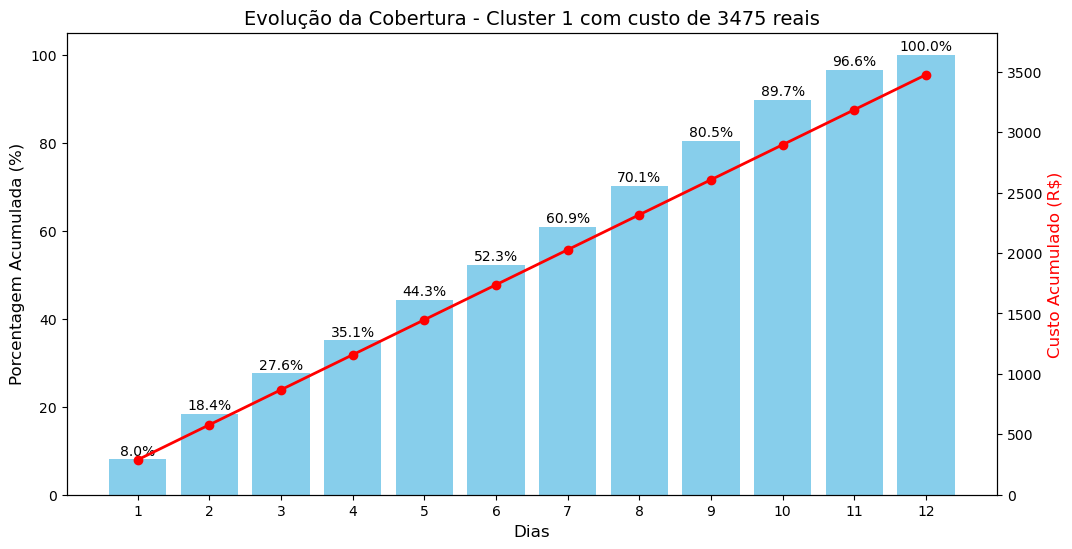

num_pontos_inicial 114


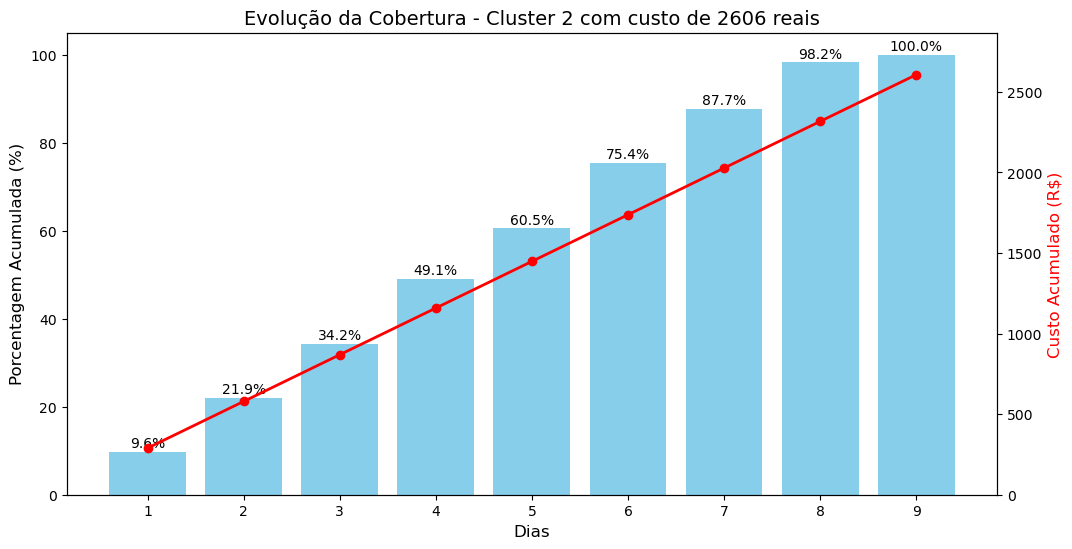

num_pontos_inicial 211
Acumulando as rotas 12 e 13 com 30 amostras
Acumulando as rotas 14 e 15 com 15 amostras


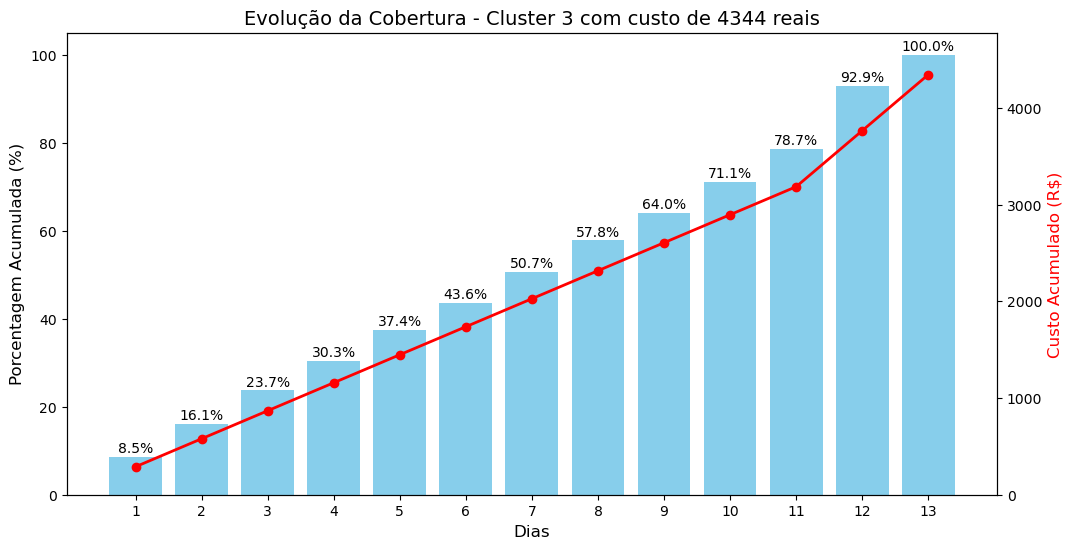

num_pontos_inicial 149


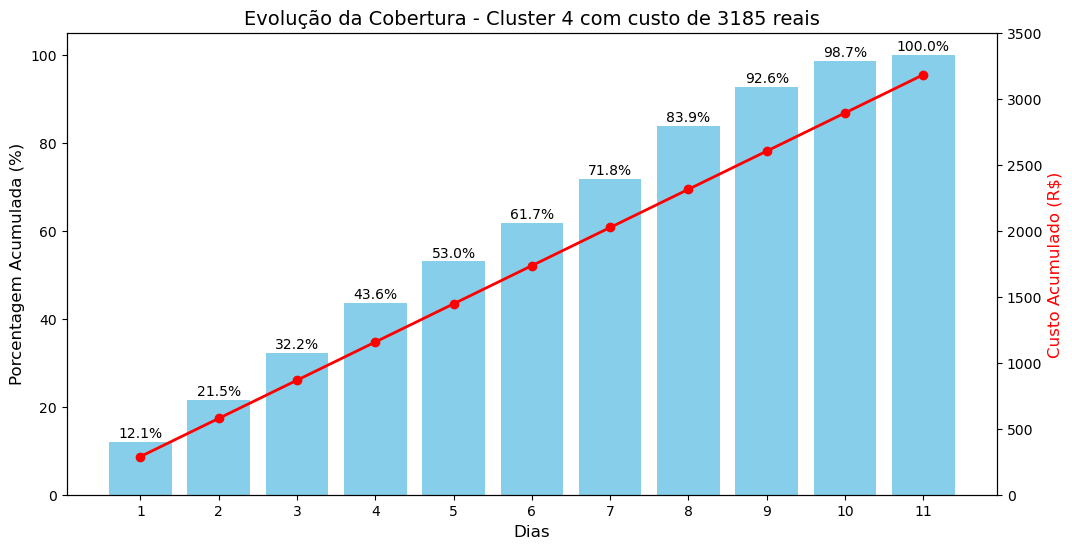

num_pontos_inicial 175


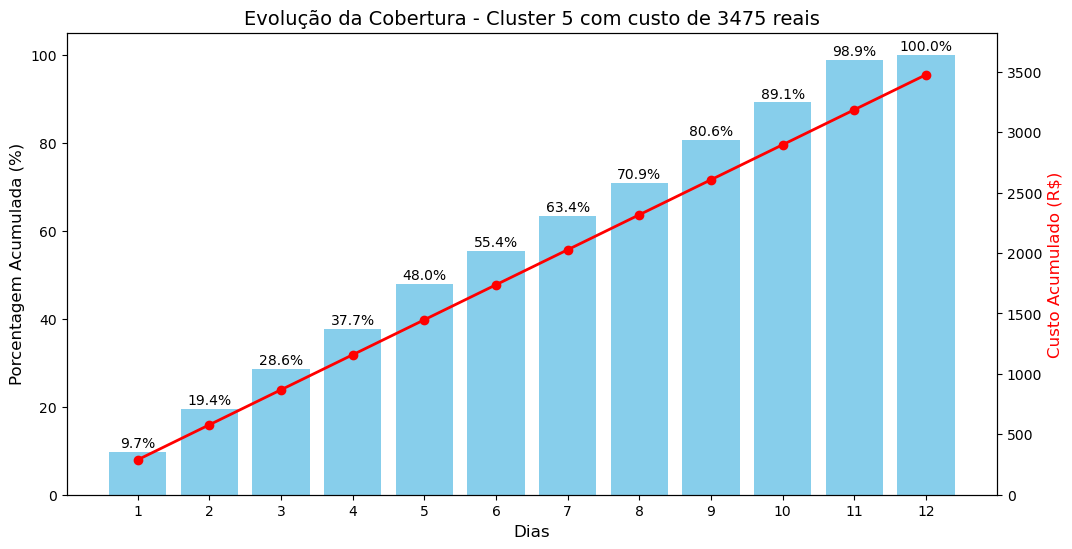

num_pontos_inicial 359
Acumulando as rotas 10 e 11 com 34 amostras
Acumulando as rotas 12, 13 e 14 com 47 amostras
Acumulando as rotas 15, 16 e 17 com 48 amostras
Acumulando as rotas 18, 19 e 20 com 41 amostras
Acumulando as rotas 21, 22 e 23 com 43 amostras
Acumulando as rotas 24, 25 e 26 com 20 amostras


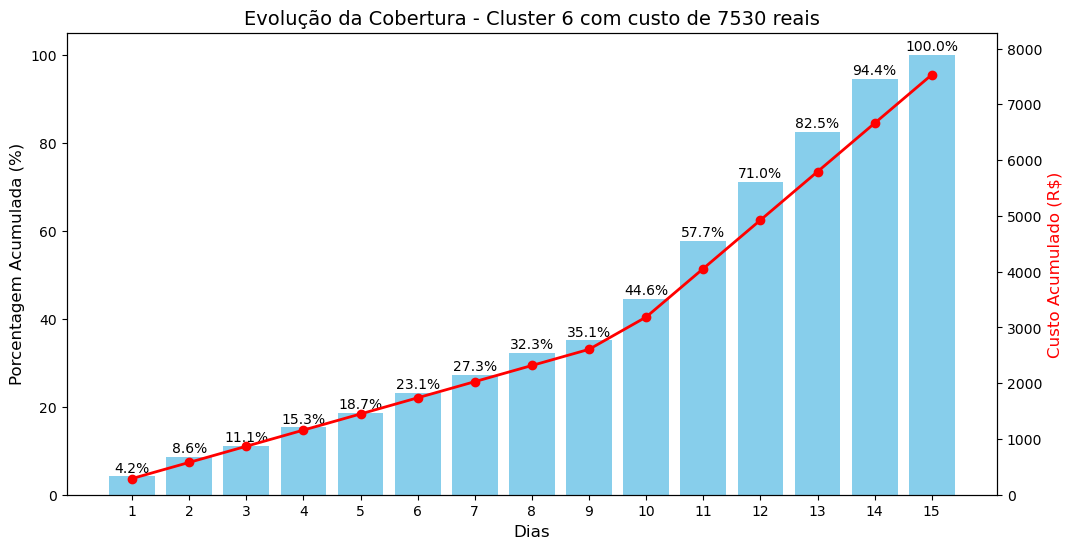

num_pontos_inicial 267
Acumulando as rotas 10 e 11 com 29 amostras
Acumulando as rotas 12 e 13 com 30 amostras
Acumulando as rotas 14 e 15 com 29 amostras
Acumulando as rotas 16 e 17 com 32 amostras
Acumulando as rotas 18 e 19 com 6 amostras


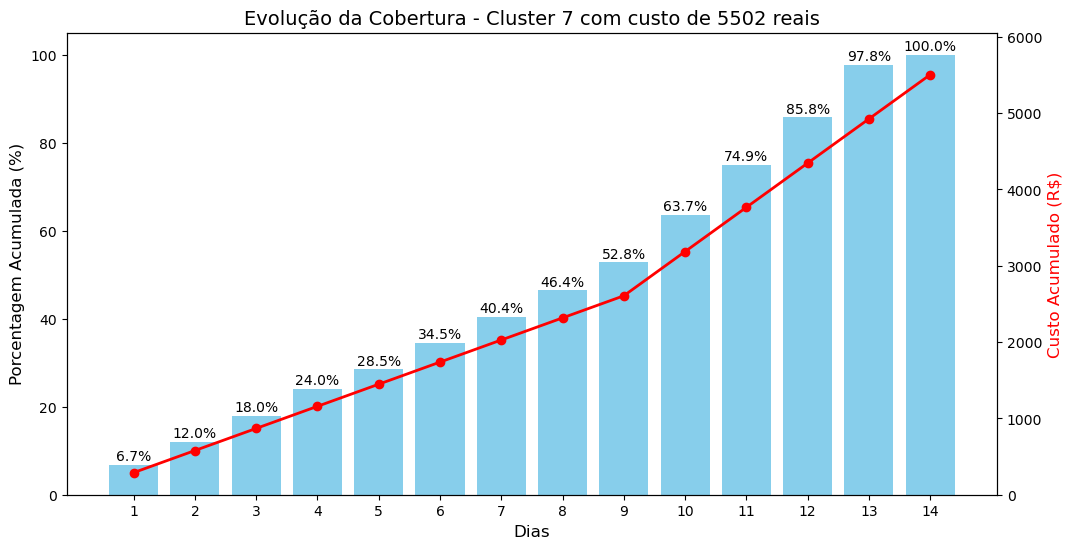

num_pontos_inicial 180


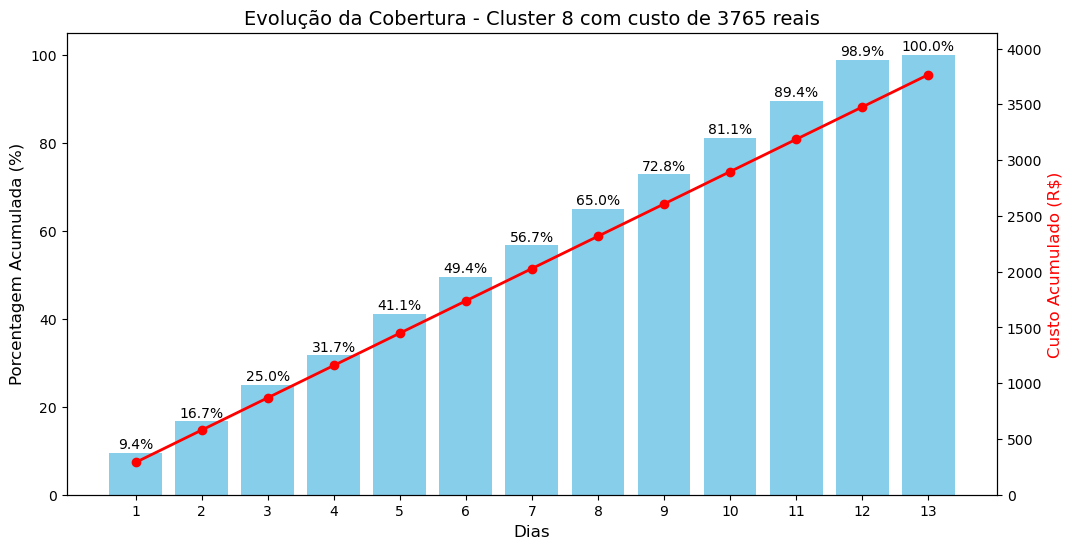

num_pontos_inicial 82


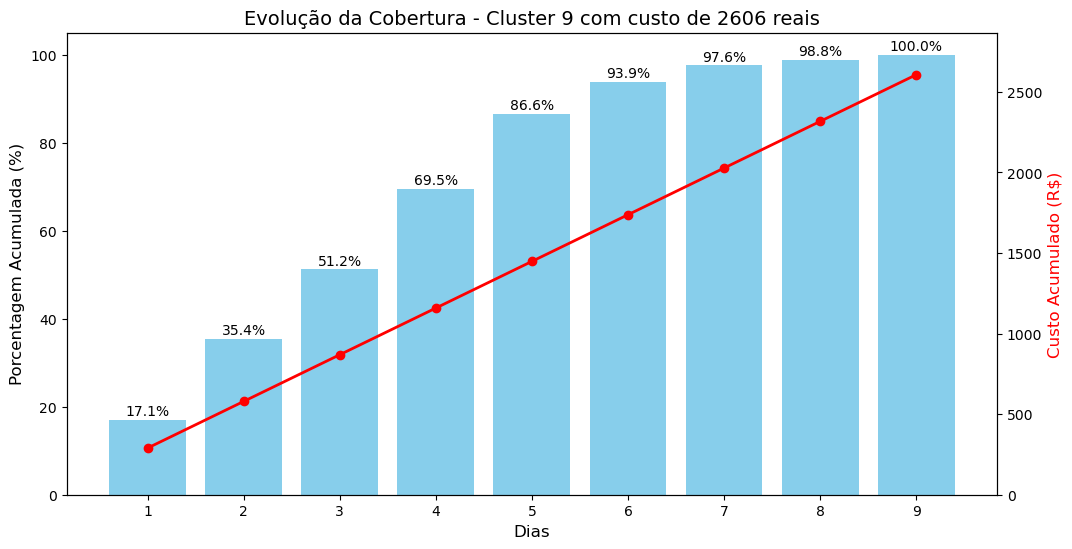

In [28]:
import matplotlib.pyplot as plt
import os

# Loop pelos clusters
for z in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos:
    output_dir = f'HK_teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)

    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 4:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 5:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 6:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 7:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 8:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0


    i = 0  # Inicializa o índice fora do loop para controle manual
    dia_atual = 1  # Variável para simular o dia

    # Inicializando dados para o gráfico de barras
    porcentagens_acumuladas = []
    custos_acumulados = []
    custo_base = 289.63  # Custo base de cada agente
    custo_total = 0  # Inicializando o custo total

    while i < len(visited_coord):
        # Condicional para acumular 3 rotas a partir do 11° dia
        if z == 5 and dia_atual >= 11:
            if i + 3 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2]) + len(visited_coord[i + 3])
            if i + 2 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2])
            elif i + 1 < len(visited_coord):  # Se houver apenas duas rotas restantes
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:  # Se for a última rota sem pares
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1}, {i+2} e {i+3} com {soma_amostras} amostras')
            i += 3  # Pula três iterações
            agentes = 3
        

        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas até o 10° dia
        elif z == 5 and i > 8 and dia_atual < 11:
            if i + 2 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                #soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 6 and i > 8:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 2 and i > 10:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        #elif z == 8 and i > 7:  # Cluster 1, acumular duas rotas após a sexta
        #    if i + 1 < len(visited_coord):
        #        soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])

         #   else:
         #       soma_amostras = len(visited_coord[i])
         #   len_selec += soma_amostras
         #   num_pontos_restantes = num_pontos_inicial - len_selec
         #   print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
         #   i += 2  # Pula duas iterações
         #   agentes = 2
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
            agentes = 1

        # Calcula porcentagem de cobertura:
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Adiciona as porcentagens ao gráfico de barras
        porcentagens_acumuladas.append(porcentagem_coberta)
        dias = list(range(1, len(porcentagens_acumuladas) + 1))
        
        # Cálculo do custo acumulado
        custo_dia = agentes * custo_base
        custo_total += custo_dia  # Acumula o custo total
        custos_acumulados.append(custo_total)

        dia_atual += 1  # Simula o avanço de dias

    # Gráfico de barras mostrando a evolução da cobertura por dia
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Definindo largura constante e ajustando espaçamento entre as barras
    bar_width = 0.8  # Define a largura das barras
    ax1.bar(dias, porcentagens_acumuladas, color='skyblue', width=bar_width)

    # Adiciona rótulos e título
    ax1.set_xlabel('Dias', fontsize=12)
    ax1.set_ylabel('Porcentagem Acumulada (%)', fontsize=12)
    ax1.set_title(f'Evolução da Cobertura - Cluster {z+1} com custo de {int(custo_total)} reais', fontsize=14)

    # Ajusta o eixo X para mostrar apenas números inteiros (dias)
    ax1.set_xticks(dias)

    # Adiciona rótulos nas barras
    for index, value in enumerate(porcentagens_acumuladas):
        ax1.text(dias[index], value + 1, f'{value:.1f}%', ha='center')

    # Criação do segundo eixo Y para os custos em vermelho
    ax2 = ax1.twinx()
    ax2.plot(dias, custos_acumulados, color='red', linewidth=2, marker='o', label='Custo Acumulado')
    ax2.set_ylabel('Custo Acumulado (R$)', fontsize=12, color='red')

    # Ajusta os limites do eixo para o gráfico de custos
    ax2.set_ylim(0, max(custos_acumulados) * 1.1)


    # Salva o gráfico em uma pasta
    plt.savefig(os.path.join(output_dir, f'HK_evolucao_cobertura_cluster_{z+1}.png'))
    plt.show()

In [17]:
len(seq_coord_0)

12

In [18]:
len(seq_coord_1)

9

In [19]:
len(seq_coord_2)

14

In [20]:
len(seq_coord_3)

11

In [21]:
len(seq_coord_4)

12

In [22]:
len(seq_coord_5)

26

In [23]:
len(seq_coord_6)

19

In [24]:
len(seq_coord_7)

13

In [25]:
len(seq_coord_8)

9

#### SUDESTE

In [ ]:
import matplotlib.pyplot as plt
import os

# Loop pelos clusters
for z in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos:
    output_dir = f'teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)

    # Inicializando o número de pontos e variáveis de controle para cada cluster
    #num_pontos_inicial = len(points) - 2  # Define para cada cluster
    #len_selec = 0  # Inicializando o total de pontos já cobertos
    #acumular_rotas = False  # Controle para acumulação de rotas a partir do 11° dia
    #soma_amostras = 0  # Quantidade de amostras acumuladas

    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        # Flag para controlar quando somar as rotas
        acumular_rotas = False
        soma_amostras = 0

    if z == 1:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 2:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    if z == 3:
        num_pontos_inicial = len(points) -2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

        acumular_rotas = False
        soma_amostras = 0

    i = 0  # Inicializa o índice fora do loop para controle manual
    dia_atual = 1  # Variável para simular o dia

    # Inicializando dados para o gráfico de barras
    porcentagens_acumuladas = []
    custos_acumulados = []
    custo_base = 289.63  # Custo base de cada agente
    custo_total = 0  # Inicializando o custo total

    while i < len(visited_coord):
        # Condicional para acumular 3 rotas a partir do 11° dia
        if z == 0 and dia_atual >= 13:
            if i + 3 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2]) + len(visited_coord[i + 3])
            elif i + 2 < len(visited_coord):  # Certifica-se de que existem duas próximas rotas para acumular
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1]) + len(visited_coord[i + 2])
            elif i + 1 < len(visited_coord):  # Se houver apenas duas rotas restantes
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:  # Se for a última rota sem pares
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1}, {i+2}, {i+3} e {i+4} com {soma_amostras} amostras')
            i += 4  # Pula três iterações
            agentes = 4

        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas até o 10° dia
        elif z == 0 and i > 3 and dia_atual < 13:
            if i + 1 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2

        elif z == 1 and i > 7:  # Cluster 1, acumular duas rotas após a sexta
            if i + 1 < len(visited_coord):
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:
                soma_amostras = len(visited_coord[i])
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
            agentes = 2
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal
            agentes = 1

        # Calcula porcentagem de cobertura:
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta

        # Adiciona as porcentagens ao gráfico de barras
        porcentagens_acumuladas.append(porcentagem_coberta)
        dias = list(range(1, len(porcentagens_acumuladas) + 1))
        
        # Cálculo do custo acumulado
        custo_dia = agentes * custo_base
        custo_total += custo_dia  # Acumula o custo total
        custos_acumulados.append(custo_total)

        dia_atual += 1  # Simula o avanço de dias

    # Gráfico de barras mostrando a evolução da cobertura por dia
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Definindo largura constante e ajustando espaçamento entre as barras
    bar_width = 0.8  # Define a largura das barras
    ax1.bar(dias, porcentagens_acumuladas, color='skyblue', width=bar_width)

    # Adiciona rótulos e título
    ax1.set_xlabel('Dias', fontsize=12)
    ax1.set_ylabel('Porcentagem Acumulada (%)', fontsize=12)
    ax1.set_title(f'Evolução da Cobertura - Cluster {z+1} com custo de {int(custo_total)} reais', fontsize=14)

    # Ajusta o eixo X para mostrar apenas números inteiros (dias)
    ax1.set_xticks(dias)

    # Adiciona rótulos nas barras
    for index, value in enumerate(porcentagens_acumuladas):
        ax1.text(dias[index], value + 1, f'{value:.1f}%', ha='center')

    # Criação do segundo eixo Y para os custos em vermelho
    ax2 = ax1.twinx()
    ax2.plot(dias, custos_acumulados, color='red', linewidth=2, marker='o', label='Custo Acumulado')
    ax2.set_ylabel('Custo Acumulado (R$)', fontsize=12, color='red')

    # Ajusta os limites do eixo para o gráfico de custos
    ax2.set_ylim(0, max(custos_acumulados) * 1.1)


    # Salva o gráfico em uma pasta
    plt.savefig(os.path.join(output_dir, f'evolucao_cobertura_cluster_{z+1}.png'))
    plt.show()



In [ ]:
len(seq_coord_0)

In [ ]:
len(seq_coord_1)

In [ ]:
len(seq_coord_2)

In [ ]:
len(seq_coord_3)

### FIM

### Devaneios:

### Entendi. Dado o cenário em que um agente de saúde visita entre 20 e 30 locais por dia, é possível utilizar métodos exatos em uma abordagem por partes, dividindo o problema em subconjuntos menores que possam ser resolvidos dentro do limite de tempo disponível. Esse tipo de abordagem é conhecido como "dividir para conquistar" ou "windowing".

#### Aqui está como você pode proceder:

##### Divisão em Subconjuntos: Divida o problema de 800 locais em subproblemas de 20 a 30 locais, que podem ser tratados como viagens diárias.

##### Aplicação de Métodos Exatos: Use um método exato como o algoritmo de Held-Karp para cada subproblema de 20 a 30 locais.

##### Combinação de Resultados: Combine os resultados diários para obter uma solução global.

##### Divisão em Subconjuntos: Uma maneira de dividir os locais pode ser com base em proximidade geográfica, ou agrupamentos, de modo que cada conjunto diário de visitas esteja razoavelmente próximo um do outro. Isso pode ser feito usando técnicas de clustering, como o algoritmo k-means.


##### Obs: O algoritmo Held-Karp (algoritmo de programação dinâmica para o TSP) ainda requer uma matriz de distâncias como entrada, mas ele é mais eficiente que a força bruta porque evita recalcular subproblemas já resolvidos. Em vez de avaliar todas as permutações possíveis das cidades (que seria a abordagem de força bruta), ele armazena soluções parciais e as reutiliza, reduzindo assim a quantidade de cálculos necessários.

### Sim, usar um raio de busca para limitar os locais de visita é uma abordagem válida e eficiente para reduzir o problema a subproblemas menores, especialmente em cenários com grande número de pontos como o seu, com 800 cidades. Essa técnica pode ser chamada de "windowing" ou "local search".

#### Abordagem Geral

##### Definir o Raio de Busca: Escolher um ponto inicial e definir um raio de busca a partir desse ponto. Somente os pontos dentro desse raio serão considerados para a visita.

##### Calcular a Matriz de Distâncias Local: Construir a matriz de distâncias apenas para os pontos dentro do raio.

##### Resolver o Subproblema: Aplicar o algoritmo Held-Karp (ou outro método exato) para resolver o subproblema restrito aos pontos dentro do raio.

##### Repetir o Processo: Escolher um novo ponto de partida e repetir o processo até que todos os pontos tenham sido visitados.

#### A seguir, apresento uma implementação dessa abordagem em Python, usando um exemplo com coordenadas geográficas:

# Gerando o "new_points" fora do loop para usar o len() para o "super_ite":
points = Modulo_exato.Region_data(postos_data, publico_data, n=0, regiao='Sudeste')
new_points = np.array([points['Latitude'][:], points['Longitude'][:]]).T

# Inicializa variáveis de controle
all_best_paths = [] 
all_paths_length = []
seq_coord = [] 
no_visited_coord = []
visited_coord = []
start_time = time.time() 
super_ite = len(new_points) - 1

print('Inicio da geração de caminhos, quantidade de amostras:', super_ite)

# Super loop:
while super_ite >= 2:
    ml_new = 0

    for i in range(0, 4):
        points = Modulo_exato.Region_data(postos_data, publico_data, n=i, regiao='Sudeste')
        #print('points [0]:', points[0])
        ponto_inicial = points['Latitude'][0], points['Longitude'][0]
        print('ponto_inicial inicio:', ponto_inicial)

        # o ponto de partida está separado!!!
        df = points[['Latitude', 'Longitude']]#[1:]
        new_points = np.array([points['Latitude'], points['Longitude']]).T
       
        # Se houver coordenadas visitadas, remova-as de points
        if len(visited_coord) > 0:
            # Criar DataFrame com as coordenadas visitadas
            df_visited = pd.DataFrame(np.vstack(visited_coord), columns=['Latitude', 'Longitude'])

            # Remover coordenadas visitadas de points
            points = points[~points[['Latitude', 'Longitude']].apply(tuple, axis=1).isin(df_visited.apply(tuple, axis=1))]

        # Transforma DF em array para entrar em "otimizador_held_karp_2"
        df = points[['Latitude', 'Longitude']]
        new_points = np.array([points['Latitude'], points['Longitude']]).T
        
        print('len_new_points:', len(new_points)-1)
        print('len_df:', len(df)-1)
        
        #print('Quantidade de Coordenadas remanescentes (inicio):', len(new_points) - 1)

        if len(new_points) -1 < ml: ########
            ml_new = len(new_points) -1
            print('ml_new:', ml_new)
            path_length, best_path, tempo_total = otimizador_held_karp_4(df, raio, max_locais=ml_new, fator_aumento=0.1,
                                                                         veiculo='bike', max_time=5.5)
        else:
            path_length, best_path, tempo_total = otimizador_held_karp_4(df, raio, max_locais=ml, fator_aumento=0.1, 
                                                                         veiculo='bike', max_time=5.5)
        
        #seq_coord.append(new_points[best_path])
        print(len(seq_coord))

        seq = new_points[best_path]
        seq_coord.append(seq)
        print('seq:', seq, 'posto:', i+1)
        
        # Talvez eu tenha que alterar isso, a saída não seria as coordenadas do 
        no_visit_coord, visit_coord = filtrar_coordenadas(seq[1:])

        # adicionar o ponto de partida dos agentes no "visit_coord"

        print('no_visit_coord:', no_visit_coord)
        print('visit_coord:', visit_coord)

        all_best_paths.append(visit_coord)
        all_paths_length.append(path_length)
        visited_coord.append(visit_coord)
        no_visited_coord.append(no_visit_coord) 
        print('len_visited:', len(visit_coord))
        print('len_no_visited:', len(no_visit_coord))

        #print('no visited coord', no_visited_coord)
        
        len_selec = len(visit_coord)
        super_ite -= len_selec
        print('Quantidade de Coordenadas remanescentes (final):', super_ite)


    

print(f'\nDuração total: {time.time() - start_time:.0f} segundos')

# Defina o caminho da pasta onde deseja salvar os arquivos
save_path = 'teste_caminhos_bike_exato_cluster'

# Verifique se a pasta existe, se não, crie-a
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Loop para automatização da geração dos mapas
for i in range(len(seq_coord)):
    # Crie o mapa com as coordenadas principais
    mapa = Modulo_exato.best_way(seq_coord[i])
    
    # Adicione as coordenadas da lista extra se existirem
    #if i < len(no_visit_coord):
    for coord in no_visited_coord[i]:
        folium.CircleMarker(
            location=coord,
            radius=5,
            fill=True,
            color="yellow",
            fill_color="yellow",
            fill_opacity=1
        ).add_to(mapa)
    
    # Salva o mapa gerado em um arquivo .html na pasta especificada
    mapa.save(os.path.join(save_path, f'mapa_{i+1}.html'))

### Cobertura:

for z in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos:
    output_dir = f'teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)

    if z == 0:
        num_pontos_inicial = len(points) - 3
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0

    if z == 1:
        num_pontos_inicial = len(points) - 2
        print('num_pontos_inicial', num_pontos_inicial)
        len_selec = 0
        
    
    for i in range(len(visited_coord)):
        amostras_adicionadas = len(visited_coord[i]) #- 1
        len_selec += amostras_adicionadas
        num_pontos_restantes = num_pontos_inicial - len_selec
        
        # Calcula porcentagem de cobertura:
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
            
        print('selec:', len_selec)
        print('rest:', num_pontos_restantes)
        print('iter:', i + 1)
        print('amostras adicionadas nesta iteração:', amostras_adicionadas)
    
        # Dados para o gráfico de pizza:
        labels = ['Publico alvo atendido', 'Publico alvo restante']
        sizes = [porcentagem_coberta, porcentagem_restante]
        
        # Cria uma figura com dois subplots lado a lado:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        
        # Ajusta o espaço entre os subplots:
        plt.subplots_adjust(wspace=0.5)  # Aumenta o espaço entre os gráficos
        
        # Gráfico de pizza:
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgrey'])
        ax1.axis('equal')
        ax1.set_title(f'Porcentagem de cobertura após a Iteração {i+1}')
        
        # Dados para o gráfico de barras:
        labels_barras = ['Publico alvo atendido', 'Publico alvo restante']
        quantidades = [len_selec+1, num_pontos_restantes+1]  ### Obs: adaptação de uma amostra para adequar a asmostra perdida!!!
        
        # Gráfico de barras:
        ax2.bar(labels_barras, quantidades, color=['skyblue', 'lightgrey'])
        ax2.set_xlabel('Status')
        ax2.set_ylabel('Quantidade')
        ax2.set_ylim(0, num_pontos_inicial+num_pontos_inicial*0.2)  # Define o valor fixo do eixo y de 0 até 850
        for index, value in enumerate(quantidades):
            ax2.text(index, value + 10, str(value), ha='center')  # Adiciona rótulos com as quantidades acima das barras
        ax2.set_title(f' {amostras_adicionadas} pontos visitados após a Iteração {i+1}')
    
        # Salva a figura com ambos os gráficos:
        output_file = os.path.join(output_dir, f'charts_iter_{i+1}.png')
        plt.savefig(output_file)
        plt.close()
    
    print('Gráficos salvos em:', output_dir)

import matplotlib.pyplot as plt
import os

# Loop pelos clusters
for z in range(0, len(mask_posto)):
    # Gerando o "new_points" fora do loop para usar o len() para o "num_pontos_inicial":
    points = Modulo_exato.Region_data_cluster(postos_data, publico_data, n=z+1, regiao=regiao)
    visited_coord = globals()[f'visited_coord_{z}']
    
    # Cria pasta para salvar os gráficos:
    output_dir = f'teste_percentual_{regiao}_cluster_{z+1}'
    os.makedirs(output_dir, exist_ok=True)

    # Inicializando o número de pontos e variáveis de controle para cada cluster
    if z == 0:
        num_pontos_inicial = len(points) - 2
        print('num_pontos_inicial cluster 1:', num_pontos_inicial)
        len_selec = 0
        acumular_rotas = False
        soma_amostras = 0

    elif z == 1:
        num_pontos_inicial = len(points) - 3
        print('num_pontos_inicial cluster 2:', num_pontos_inicial)
        len_selec = 0
        acumular_rotas = False
        soma_amostras = 0
    
    i = 0  # Inicializa o índice fora do loop para controle manual
    
    # Inicializando dados para o gráfico de barras
    porcentagens_acumuladas = []

    while i < len(visited_coord):
        # Se z == 0 e for a terceira rota ou mais, acumulamos as amostras de duas em duas
        if z == 0 and i >= 2:
            # Acumula duas rotas a partir da terceira, somando sempre de dois em dois até o final
            if i + 1 < len(visited_coord):  # Certifica-se de que existe uma próxima rota
                soma_amostras = len(visited_coord[i]) + len(visited_coord[i + 1])
            else:
                soma_amostras = len(visited_coord[i])  # Se for a última rota sem par
            len_selec += soma_amostras
            num_pontos_restantes = num_pontos_inicial - len_selec
            print(f'Acumulando as rotas {i+1} e {i+2} com {soma_amostras} amostras')
            i += 2  # Pula duas iterações
        else:
            # Caso normal, amostras adicionadas de uma única rota
            amostras_adicionadas = len(visited_coord[i])
            len_selec += amostras_adicionadas
            num_pontos_restantes = num_pontos_inicial - len_selec
            i += 1  # Avança uma iteração normal

        # Calcula porcentagem de cobertura:
        porcentagem_coberta = 100 * len_selec / num_pontos_inicial
        porcentagem_restante = 100 - porcentagem_coberta
        
        print(f'Seleção acumulada: {len_selec}, Pontos restantes: {num_pontos_restantes}, Dia {i}')
        
        # Adiciona as porcentagens ao gráfico de barras
        porcentagens_acumuladas.append(porcentagem_coberta)
        dias = list(range(1, len(porcentagens_acumuladas) + 1))
    
    # Gráfico de barras mostrando a evolução da cobertura por dia
    plt.figure(figsize=(10, 6))

    # Definindo largura constante e ajustando espaçamento entre as barras
    bar_width = 0.5  # Define a largura das barras
    plt.bar(dias, porcentagens_acumuladas, color='lightblue', width=bar_width)

    # Adiciona rótulos e título
    plt.xlabel('Dias', fontsize=12)
    plt.ylabel('Porcentagem Acumulada (%)', fontsize=12)
    plt.title(f'Evolução da Cobertura - Cluster {z+1}', fontsize=14)

    # Adiciona grid ao gráfico
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Ajusta o eixo X para mostrar apenas números inteiros (dias)
    plt.xticks(dias)

    # Adiciona rótulos nas barras
    for index, value in enumerate(porcentagens_acumuladas):
        plt.text(dias[index], value + 1, f'{value:.1f}%', ha='center')

    # Salva o gráfico em uma pasta
    plt.savefig(os.path.join(output_dir, f'evolucao_cobertura_cluster_{z+1}.png'))
    plt.show()